In [1]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
configtf = tf.ConfigProto()
configtf.gpu_options.allow_growth = True
configtf.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=configtf))

/home/mara/venv/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import keras.backend as K
import numpy as np
import keras.datasets
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from memorization_utils import *
import os
from sklearn.linear_model import Ridge
import sys 
sys.path.append('../rcvs_fexps/')
sys.path.append('../rcvs_fexps/iMIMIC-RCVs/')
sys.path.append('../rcvs_fexps/iMIMIC-RCVs/scripts/')
sys.path.append('../rcvs_fexps/iMIMIC-RCVs/scripts/keras_vis_rcv/')
#from rcv_utils import *
from mnist_utils import *
import rcv_utils
import PIL

from scipy import misc
import numpy as np
#import tensorflow as tf
import argparse

import cv2
import h5py

from dataset_utils import *

In [3]:
source='/mnt/nas2/results/IntermediateResults/Mara/probes'
folders = os.listdir('{}/dtd/images/'.format(source))
textures = os.listdir('{}/dtd/images/'.format(source))

In [4]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_split(1, source, textures)
print x_train.shape
print x_val.shape
print x_test.shape

Loading split no. 1
778 900
(1880, 778, 900, 4)
(1880, 299, 299, 3)
(1880, 299, 299, 3)


In [13]:
#del models
import models
reload(models)
from models import *

#del models
import dataset_utils
reload(dataset_utils)
from dataset_utils import *

In [11]:
K.clear_session()
inceptionv3 = InceptionV3(batch_size=64)

In [7]:
inceptionv3.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [8]:
try:
    print dataset
except:
    train_data = (x_train, y_train)
    val_data= (x_val, y_val) 
    test_data = (x_test, y_test)

    #dataset = Dataset(train_data, val_data, test_data) 

In [14]:
### New experiment to check that the performance at random is correct 
#  hopefully it'll be lower than the initial results we got!!!!
K.clear_session()
inceptionv3 = InceptionV3(batch_size=64)
dataset = Dataset(train_data, val_data, test_data, label_corrupt_p = 0.0, random_seed=0) 
inceptionv3.train_and_compute_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6'])
'''REP 0 with label corruption at 0.0'''
inceptionv3.save('random_fix_0.0lcp_rep0', '/mnt/nas2/results/IntermediateResults/Mara/probes/trained_models')

Train generator ready, time elapsed: 218.157158852


ResourceExhaustedError: OOM when allocating tensor with shape[1,1,2048,320] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_86/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=9620299, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_86/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op u'conv2d_86/random_uniform/RandomUniform', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/mara/venv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/mara/venv/local/lib/python2.7/site-packages/tornado/ioloop.py", line 1064, in start
    handler_func(fd_obj, events)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/mara/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mara/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mara/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mara/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-dcd33dcf53ff>", line 4, in <module>
    inceptionv3 = InceptionV3(batch_size=64)
  File "models.py", line 39, in __init__
    classes=n_classes)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/applications/inception_v3.py", line 326, in InceptionV3
    branch1x1 = conv2d_bn(x, 320, 1, 1)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/applications/inception_v3.py", line 81, in conv2d_bn
    name=conv_name)(x)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/engine/topology.py", line 592, in __call__
    self.build(input_shapes[0])
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/layers/convolutional.py", line 138, in build
    constraint=self.kernel_constraint)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/engine/topology.py", line 413, in add_weight
    weight = K.variable(initializer(shape),
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/initializers.py", line 217, in __call__
    dtype=dtype, seed=self.seed)
  File "/home/mara/venv/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 3838, in random_uniform
    dtype=dtype, seed=seed)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/ops/random_ops.py", line 242, in random_uniform
    rnd = gen_random_ops.random_uniform(shape, dtype, seed=seed1, seed2=seed2)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/ops/gen_random_ops.py", line 674, in random_uniform
    name=name)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1,1,2048,320] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_86/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=9620299, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_86/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [8]:
## Adding label corruption
# NEW VERS
'''REP 1 : seed = 1
[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 26 26
 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 12 12 12 12 12
 12 
 [16 27 32 29 31 33 23 38 13  8  7 29 17 28 42 16 45 25  2 22 37 17  3 11
  3 26 34 33 40 33 11 28 23 13 40 32 36 20 29 20 14 16 28  0 21 29 18 15
 33  6 22  3 33 34 19 24  3 19 11 41  2  7 16 32 25 14 35  0 41 32 27  1
 REP 2 : seed = 2
[ 1  7 35 17 19 35  7 37 19 23 41 22 30 30 45 30 25 15 13 41 14 10 35 45
  0 34 14 29 25  6  2 41  0  2 21 27 26  8 12  1  3 40 30 22 38  8 23 38
 26 36 30  7 20 12 10  9 25 40 18 42 25 18 43 17 17  6 40  7 19  7 19 45
 REP 3 : seed = 3
[29  2 24 40 43 10  7 41 40 27  4  1  4 28 18  7 21 41 12  5 40 18 17 40
 10 24 16 10 37 26  3 11 18 25 36  3 28 24  5  2  6 16  4 28 16  0 44 240
 34 32 40 38 37 44 33 33 11 46 30 41 28 22 31 18 20 15  0 10 32 20  1 30
'''
dataset = Dataset(train_data, val_data, test_data, label_corrupt_p = 0.3, random_seed=0) 

NEW VERS
[41 41 41 41 41 41 41 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 12 12 12 12 12 12 12 12 12 12 12 12  5  5  5  5  5  5  5  5  5  2
  2  2  2  2  2  2  2  2  2  2  2  2  2 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 35 35 35 35 35 35 35 35 35 35 35 35  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 28 28
 28 28 28 28 28 28 28 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33
 38 38 38 38 38 38 38 38 38 38 38 15 15 15 15 15 15 15 15 15 15 15 23 23
 23 23 23 23 23 23 23 23 23 23 23 45 45 45 45 45 45 45 45 45 45 27 27 27
 27 27 27 27 27 27 27 27 19 19 19 19 19 19 19 19 19 19 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11  9  9  9  9  9  9  9  9  9  9  9  9  8
  8  8  8  8  8  8  8  8  8  8  8  8 18 18 18 18 18 18 18 18 18 18 18 18
 18 32 32 32 32 32 32 32 32 32  6  6  6  6  6  6  6  6  6  0  0  0  0  0
  0  0  0  0  0  0  0  0 20 20 20 20 20 20 20 20 20 20 20 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 24 24 24 24

In [9]:
K.clear_session()
inceptionv3 = InceptionV3(batch_size=64)
dataset = Dataset(train_data, val_data, test_data, label_corrupt_p = 0.3, random_seed=0) 
inceptionv3.train_and_compute_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])
'''REP 0 with label corruption at 0.3'''
inceptionv3.save('0.3lcp_rep0', '/mnt/nas2/results/IntermediateResults/Mara/probes/trained_models')

NEW VERS
[41 41 41 41 41 41 41 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
 26 26 12 12 12 12 12 12 12 12 12 12 12 12  5  5  5  5  5  5  5  5  5  2
  2  2  2  2  2  2  2  2  2  2  2  2  2 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 35 35 35 35 35 35 35 35 35 35 35 35  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 28 28
 28 28 28 28 28 28 28 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33
 38 38 38 38 38 38 38 38 38 38 38 15 15 15 15 15 15 15 15 15 15 15 23 23
 23 23 23 23 23 23 23 23 23 23 23 45 45 45 45 45 45 45 45 45 45 27 27 27
 27 27 27 27 27 27 27 27 19 19 19 19 19 19 19 19 19 19 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11  9  9  9  9  9  9  9  9  9  9  9  9  8
  8  8  8  8  8  8  8  8  8  8  8  8 18 18 18 18 18 18 18 18 18 18 18 18
 18 32 32 32 32 32 32 32 32 32  6  6  6  6  6  6  6  6  6  0  0  0  0  0
  0  0  0  0  0  0  0  0 20 20 20 20 20 20 20 20 20 20 20 37 37 37 37 37
 37 37 37 37 37 37 37 37 37 37 24 24 24 24

Epoch: 87, loss: 3.41958212852, acc: 0.125
Epoch: 88, loss: 3.41405725479, acc: 0.119612067938
Epoch: 89, loss: 3.39634799957, acc: 0.130387932062
Epoch: 90, loss: 3.37813663483, acc: 0.123383618891
Val: 0.0479525849223
Epoch: 91, loss: 3.38998651505, acc: 0.128232762218
Epoch: 92, loss: 3.34696483612, acc: 0.136314660311
Epoch: 93, loss: 3.3101952076, acc: 0.147090524435
Epoch: 94, loss: 3.33262705803, acc: 0.135775864124
Epoch: 95, loss: 3.3115644455, acc: 0.142780169845
Epoch: 96, loss: 3.28395104408, acc: 0.143857762218
Epoch: 97, loss: 3.28199052811, acc: 0.137931033969
Epoch: 98, loss: 3.27277684212, acc: 0.143857762218
Epoch: 99, loss: 3.29027104378, acc: 0.140086203814
Epoch: 100, loss: 3.26408934593, acc: 0.150323271751
Val: 0.051724139601
Epoch: 101, loss: 3.2711186409, acc: 0.153556033969
Epoch: 102, loss: 3.24578142166, acc: 0.150323271751
Epoch: 103, loss: 3.24844837189, acc: 0.149784475565
Epoch: 104, loss: 3.19867920876, acc: 0.158943966031
Epoch: 105, loss: 3.2271709442

Epoch: 238, loss: 1.10428535938, acc: 0.673491358757
Epoch: 239, loss: 1.05763447285, acc: 0.699353456497
Epoch: 240, loss: 1.06412577629, acc: 0.681034505367
Val: 0.0619612075388
Epoch: 241, loss: 1.00904166698, acc: 0.699892222881
Epoch: 242, loss: 0.988991379738, acc: 0.696120679379
Epoch: 243, loss: 1.03186488152, acc: 0.701508641243
Epoch: 244, loss: 0.946721255779, acc: 0.726293087006
Epoch: 245, loss: 0.94472771883, acc: 0.72413790226
Epoch: 246, loss: 1.04973018169, acc: 0.704741358757
Epoch: 247, loss: 0.930662989616, acc: 0.727909505367
Epoch: 248, loss: 0.888588547707, acc: 0.740301728249
Epoch: 249, loss: 0.838137209415, acc: 0.747844815254
Epoch: 250, loss: 0.933674991131, acc: 0.729525864124
Val: 0.0571120679379
Epoch: 251, loss: 0.888713479042, acc: 0.737607777119
Epoch: 252, loss: 0.826658308506, acc: 0.755926728249
Epoch: 253, loss: 0.84598916769, acc: 0.75
Epoch: 254, loss: 0.854865133762, acc: 0.748383641243
Epoch: 255, loss: 0.879616320133, acc: 0.751616358757
Epoch

Epoch: 386, loss: 0.268183141947, acc: 0.921875
Epoch: 387, loss: 0.279777407646, acc: 0.914870679379
Epoch: 388, loss: 0.221298515797, acc: 0.931573271751
Epoch: 389, loss: 0.288922488689, acc: 0.917025864124
Epoch: 390, loss: 0.266585558653, acc: 0.922952592373
Val: 0.0625
Epoch: 391, loss: 0.2779687047, acc: 0.91648709774
Epoch: 392, loss: 0.263970404863, acc: 0.92456895113
Epoch: 393, loss: 0.274520754814, acc: 0.915948271751
Epoch: 394, loss: 0.254317164421, acc: 0.925107777119
Epoch: 395, loss: 0.308562248945, acc: 0.90894395113
Epoch: 396, loss: 0.289128810167, acc: 0.915409505367
Epoch: 397, loss: 0.262554943562, acc: 0.920258641243
Epoch: 398, loss: 0.272805631161, acc: 0.913254320621
Epoch: 399, loss: 0.274929314852, acc: 0.915409505367
Epoch: 400, loss: 0.326645106077, acc: 0.899784505367
Val: 0.0711206868291
Epoch: 401, loss: 0.266286849976, acc: 0.917025864124
Epoch: 402, loss: 0.245829924941, acc: 0.922952592373
Epoch: 403, loss: 0.246857762337, acc: 0.934267222881
Epoch:

Epoch: 535, loss: 0.133504524827, acc: 0.957435369492
Epoch: 536, loss: 0.190077573061, acc: 0.953663766384
Epoch: 537, loss: 0.134833842516, acc: 0.96336209774
Epoch: 538, loss: 0.13228276372, acc: 0.95851290226
Epoch: 539, loss: 0.140276089311, acc: 0.957435369492
Epoch: 540, loss: 0.150265157223, acc: 0.952047407627
Val: 0.068426720798
Epoch: 541, loss: 0.127257362008, acc: 0.956896543503
Epoch: 542, loss: 0.14311209321, acc: 0.960129320621
Epoch: 543, loss: 0.164721205831, acc: 0.952047407627
Epoch: 544, loss: 0.147948682308, acc: 0.955280184746
Epoch: 545, loss: 0.146632164717, acc: 0.962284505367
Epoch: 546, loss: 0.149263694882, acc: 0.954741358757
Epoch: 547, loss: 0.141085192561, acc: 0.953663766384
Epoch: 548, loss: 0.13353869319, acc: 0.959590494633
Epoch: 549, loss: 0.161786586046, acc: 0.954741358757
Epoch: 550, loss: 0.166468262672, acc: 0.951508641243
Val: 0.0797413811088
Epoch: 551, loss: 0.155513375998, acc: 0.951508641243
Epoch: 552, loss: 0.140603795648, acc: 0.95689

UnboundLocalError: local variable 'max_row' referenced before assignment

In [10]:
inceptionv3.save('0.3lcp_rep0', '/mnt/nas2/results/IntermediateResults/Mara/probes/trained_models')

Saved model to disk
History not saved


In [11]:
K.clear_session()
inceptionv3 = InceptionV3(batch_size=64)
dataset = Dataset(train_data, val_data, test_data, label_corrupt_p = 0.8, random_seed=0) 
inceptionv3.train_and_compute_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])
'''REP 0 with label corruption at 0.8'''
inceptionv3.save('0.8lcp_rep0', '/mnt/nas2/results/IntermediateResults/Mara/probes/trained_models')

NEW VERS
[41 41 41 ... 36 36 36]
(1476,)
[15 32  1 ... 14 15 16]
(1476,)
Train generator ready, time elapsed: 17.996776104
Epoch: 0, loss: 4.31330776215, acc: 0.015625
Val: 0.0210129301995
Epoch: 1, loss: 4.1668844223, acc: 0.016702586785
Epoch: 2, loss: 4.11418962479, acc: 0.0193965509534
Epoch: 3, loss: 4.26196575165, acc: 0.0183189660311
Epoch: 4, loss: 4.12186288834, acc: 0.015625
Epoch: 5, loss: 4.10747671127, acc: 0.0188577584922
Epoch: 6, loss: 4.29759311676, acc: 0.0231681037694
Epoch: 7, loss: 4.20042514801, acc: 0.0193965509534
Epoch: 8, loss: 4.09047794342, acc: 0.0183189660311
Epoch: 9, loss: 4.05858659744, acc: 0.0177801717073
Epoch: 10, loss: 4.06033468246, acc: 0.0161637924612
Val: 0.0188577584922
Epoch: 11, loss: 4.04693984985, acc: 0.0188577584922
Epoch: 12, loss: 4.07635211945, acc: 0.0204741377383
Epoch: 13, loss: 4.08995723724, acc: 0.0193965509534
Epoch: 14, loss: 4.06286430359, acc: 0.0129310349002
Epoch: 15, loss: 4.05800485611, acc: 0.0188577584922
Epoch: 16, lo

Epoch: 148, loss: 3.21480536461, acc: 0.151939660311
Epoch: 149, loss: 3.26065897942, acc: 0.142780169845
Epoch: 150, loss: 3.22731971741, acc: 0.14762930572
Val: 0.0226293094456
Epoch: 151, loss: 3.20280170441, acc: 0.161099135876
Epoch: 152, loss: 3.18925285339, acc: 0.170258626342
Epoch: 153, loss: 3.16928935051, acc: 0.175646558404
Epoch: 154, loss: 3.1974594593, acc: 0.165409475565
Epoch: 155, loss: 3.16455888748, acc: 0.157866373658
Epoch: 156, loss: 3.15656328201, acc: 0.175646558404
Epoch: 157, loss: 3.16433238983, acc: 0.16325430572
Epoch: 158, loss: 3.11254858971, acc: 0.197198271751
Epoch: 159, loss: 3.12961101532, acc: 0.179956898093
Epoch: 160, loss: 3.08786582947, acc: 0.184806033969
Val: 0.0231681037694
Epoch: 161, loss: 3.07542824745, acc: 0.17887930572
Epoch: 162, loss: 3.05347299576, acc: 0.198814660311
Epoch: 163, loss: 3.05527925491, acc: 0.191271558404
Epoch: 164, loss: 3.00047445297, acc: 0.211206898093
Epoch: 165, loss: 3.03032469749, acc: 0.19450430572
Epoch: 16

Epoch: 298, loss: 0.833765864372, acc: 0.77101290226
Epoch: 299, loss: 0.699335455894, acc: 0.79956895113
Epoch: 300, loss: 0.692457020283, acc: 0.786099135876
Val: 0.0328663811088
Epoch: 301, loss: 0.649897933006, acc: 0.808728456497
Epoch: 302, loss: 0.654918313026, acc: 0.810883641243
Epoch: 303, loss: 0.668532788754, acc: 0.811422407627
Epoch: 304, loss: 0.692501544952, acc: 0.810344815254
Epoch: 305, loss: 0.651425778866, acc: 0.825969815254
Epoch: 306, loss: 0.694044649601, acc: 0.80226290226
Epoch: 307, loss: 0.638267695904, acc: 0.823275864124
Epoch: 308, loss: 0.60791438818, acc: 0.824353456497
Epoch: 309, loss: 0.646574139595, acc: 0.81519395113
Epoch: 310, loss: 0.654594004154, acc: 0.813577592373
Val: 0.0323275849223
Epoch: 311, loss: 0.599943876266, acc: 0.821659505367
Epoch: 312, loss: 0.59032022953, acc: 0.836745679379
Epoch: 313, loss: 0.600162923336, acc: 0.829202592373
Epoch: 314, loss: 0.62873762846, acc: 0.820581912994
Epoch: 315, loss: 0.533407390118, acc: 0.850754

KeyboardInterrupt: 

In [12]:
inceptionv3.save('0.8lcp_rep0', '/mnt/nas2/results/IntermediateResults/Mara/probes/trained_models')

Saved model to disk
History not saved


In [66]:
K.clear_session()
inceptionv3 = InceptionV3(batch_size=64)
dataset = Dataset(train_data, val_data, test_data, label_corrupt_p = 0., random_seed=3) 
inceptionv3.train_and_compute_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])
'''REP 3'''
inceptionv3.save('0.corr_rep2', '/mnt/nas2/results/IntermediateResults/Mara/probes/trained_models')

Train generator ready, time elapsed: 17.9912278652
Epoch: 0, loss: 4.22448062897, acc: 0.0161637924612
Val: 0.0215517245233
Epoch: 1, loss: 4.13922929764, acc: 0.0199353452772
Epoch: 2, loss: 4.11470508575, acc: 0.0215517245233
Epoch: 3, loss: 4.06615638733, acc: 0.0274784490466
Epoch: 4, loss: 4.32785987854, acc: 0.0215517245233
Epoch: 5, loss: 4.1319565773, acc: 0.0264008622617
Epoch: 6, loss: 4.05671453476, acc: 0.0350215509534
Epoch: 7, loss: 4.05777788162, acc: 0.0274784490466
Epoch: 8, loss: 6.40079784393, acc: 0.0215517245233
Epoch: 9, loss: 4.11753320694, acc: 0.0237068962306
Epoch: 10, loss: 4.03929042816, acc: 0.0220905169845
Val: 0.0188577584922
Epoch: 11, loss: 4.01333761215, acc: 0.0350215509534
Epoch: 12, loss: 4.00271701813, acc: 0.0339439660311
Epoch: 13, loss: 3.9786157608, acc: 0.0463362075388
Epoch: 14, loss: 4.00674629211, acc: 0.0344827584922
Epoch: 15, loss: 3.99836969376, acc: 0.036099139601
Epoch: 16, loss: 3.98764610291, acc: 0.0436422415078
Epoch: 17, loss: 3.

Epoch: 150, loss: 1.09661877155, acc: 0.663793087006
Val: 0.118534483016
Epoch: 151, loss: 1.07151710987, acc: 0.670258641243
Epoch: 152, loss: 0.995580732822, acc: 0.701508641243
Epoch: 153, loss: 1.03542530537, acc: 0.688577592373
Epoch: 154, loss: 1.02971994877, acc: 0.686961233616
Epoch: 155, loss: 1.00346112251, acc: 0.690732777119
Epoch: 156, loss: 1.01127409935, acc: 0.68480604887
Epoch: 157, loss: 1.02399849892, acc: 0.678879320621
Epoch: 158, loss: 0.909112811089, acc: 0.714978456497
Epoch: 159, loss: 0.956461489201, acc: 0.711745679379
Epoch: 160, loss: 0.892854273319, acc: 0.734375
Val: 0.102370686829
Epoch: 161, loss: 0.872834563255, acc: 0.726831912994
Epoch: 162, loss: 0.897854626179, acc: 0.731142222881
Epoch: 163, loss: 0.846710920334, acc: 0.732758641243
Epoch: 164, loss: 0.89856338501, acc: 0.738685369492
Epoch: 165, loss: 0.859209120274, acc: 0.730603456497
Epoch: 166, loss: 0.857198238373, acc: 0.746767222881
Epoch: 167, loss: 0.849512815475, acc: 0.748922407627
Epo

UnboundLocalError: local variable 'max_row' referenced before assignment

In [52]:
inceptionv3.train_and_monitor_with_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])
'''REP 3
Train generator ready, time elapsed: 27.4207718372
...
Epoch: 1000, loss: 0.093232318759, acc: 0.971982777119
Val: 0.0522629320621'''
inceptionv3.save('0.5corr_rep3', '/mnt/nas2/results/IntermediateResults/Mara/probes/trained_models')

Train generator ready, time elapsed: 27.4207718372
Epoch: 0, loss: 4.25268268585, acc: 0.0199353452772
Val: 0.0210129301995
Epoch: 1, loss: 4.08088541031, acc: 0.0140086207539
Epoch: 2, loss: 4.08960580826, acc: 0.0183189660311
Epoch: 3, loss: 4.28994655609, acc: 0.0188577584922
Epoch: 4, loss: 4.10726165771, acc: 0.0220905169845
Epoch: 5, loss: 4.08601951599, acc: 0.0172413792461
Epoch: 6, loss: 4.11702013016, acc: 0.0220905169845
Epoch: 7, loss: 4.38893842697, acc: 0.0215517245233
Epoch: 8, loss: 4.08279895782, acc: 0.0204741377383
Epoch: 9, loss: 4.08253002167, acc: 0.0172413792461
Epoch: 10, loss: 4.05529880524, acc: 0.015625
Val: 0.0210129301995
Epoch: 11, loss: 4.09417819977, acc: 0.0199353452772
Epoch: 12, loss: 3.89196228981, acc: 0.0210129301995
Epoch: 13, loss: 3.85472178459, acc: 0.0188577584922
Epoch: 14, loss: 3.84703850746, acc: 0.0258620698005
Epoch: 15, loss: 3.8386824131, acc: 0.0258620698005
Epoch: 16, loss: 3.8363904953, acc: 0.0237068962306
Epoch: 17, loss: 3.837684

Epoch: 150, loss: 2.85848760605, acc: 0.238146558404
Val: 0.0393318980932
Epoch: 151, loss: 2.78147721291, acc: 0.254849135876
Epoch: 152, loss: 2.75659704208, acc: 0.26831895113
Epoch: 153, loss: 2.78502392769, acc: 0.261853456497
Epoch: 154, loss: 2.76608371735, acc: 0.257004320621
Epoch: 155, loss: 2.7260863781, acc: 0.259159475565
Epoch: 156, loss: 2.76397657394, acc: 0.260237067938
Epoch: 157, loss: 2.71518540382, acc: 0.281788796186
Epoch: 158, loss: 2.67981314659, acc: 0.28125
Epoch: 159, loss: 2.65944933891, acc: 0.304418116808
Epoch: 160, loss: 2.61624121666, acc: 0.285560339689
Val: 0.036099139601
Epoch: 161, loss: 2.61343979836, acc: 0.304418116808
Epoch: 162, loss: 2.62194061279, acc: 0.297952592373
Epoch: 163, loss: 2.56215238571, acc: 0.311961203814
Epoch: 164, loss: 2.59094023705, acc: 0.306573271751
Epoch: 165, loss: 2.56906914711, acc: 0.316271543503
Epoch: 166, loss: 2.58695650101, acc: 0.313577592373
Epoch: 167, loss: 2.48215961456, acc: 0.327047407627
Epoch: 168, lo

Epoch: 300, loss: 0.669840395451, acc: 0.802801728249
Val: 0.0393318980932
Epoch: 301, loss: 0.696126818657, acc: 0.793103456497
Epoch: 302, loss: 0.726688623428, acc: 0.788254320621
Epoch: 303, loss: 0.644797682762, acc: 0.806573271751
Epoch: 304, loss: 0.70049148798, acc: 0.803340494633
Epoch: 305, loss: 0.665074050426, acc: 0.807650864124
Epoch: 306, loss: 0.620556354523, acc: 0.801724135876
Epoch: 307, loss: 0.644273638725, acc: 0.810344815254
Epoch: 308, loss: 0.681252539158, acc: 0.801185369492
Epoch: 309, loss: 0.595883905888, acc: 0.834051728249
Epoch: 310, loss: 0.608031749725, acc: 0.821120679379
Val: 0.0398706905544
Epoch: 311, loss: 0.660578608513, acc: 0.806573271751
Epoch: 312, loss: 0.607635557652, acc: 0.823275864124
Epoch: 313, loss: 0.594187378883, acc: 0.816810369492
Epoch: 314, loss: 0.598370909691, acc: 0.827047407627
Epoch: 315, loss: 0.575464129448, acc: 0.829741358757
Epoch: 316, loss: 0.59504109621, acc: 0.822198271751
Epoch: 317, loss: 0.596738874912, acc: 0.8

Epoch: 447, loss: 0.235496684909, acc: 0.92726290226
Epoch: 448, loss: 0.266398191452, acc: 0.913793087006
Epoch: 449, loss: 0.210345119238, acc: 0.93480604887
Epoch: 450, loss: 0.240713313222, acc: 0.922413766384
Val: 0.0511853434145
Epoch: 451, loss: 0.221486732364, acc: 0.93211209774
Epoch: 452, loss: 0.23868958652, acc: 0.935344815254
Epoch: 453, loss: 0.25883731246, acc: 0.925107777119
Epoch: 454, loss: 0.274329334497, acc: 0.91918104887
Epoch: 455, loss: 0.212261974812, acc: 0.93480604887
Epoch: 456, loss: 0.254715830088, acc: 0.918642222881
Epoch: 457, loss: 0.236626416445, acc: 0.924030184746
Epoch: 458, loss: 0.241201147437, acc: 0.92726290226
Epoch: 459, loss: 0.234390720725, acc: 0.925107777119
Epoch: 460, loss: 0.202315837145, acc: 0.9375
Val: 0.0436422415078
Epoch: 461, loss: 0.239998966455, acc: 0.929956912994
Epoch: 462, loss: 0.218117281795, acc: 0.933728456497
Epoch: 463, loss: 0.31380340457, acc: 0.90355604887
Epoch: 464, loss: 0.219379365444, acc: 0.933728456497
Epoc

Epoch: 595, loss: 0.145787462592, acc: 0.952586233616
Epoch: 596, loss: 0.150804743171, acc: 0.947198271751
Epoch: 597, loss: 0.105947829783, acc: 0.962823271751
Epoch: 598, loss: 0.124876432121, acc: 0.959051728249
Epoch: 599, loss: 0.161490127444, acc: 0.952047407627
Epoch: 600, loss: 0.165263697505, acc: 0.945043087006
Val: 0.0414870679379
Epoch: 601, loss: 0.152475938201, acc: 0.953125
Epoch: 602, loss: 0.144011124969, acc: 0.953125
Epoch: 603, loss: 0.112013831735, acc: 0.96336209774
Epoch: 604, loss: 0.149423182011, acc: 0.957974135876
Epoch: 605, loss: 0.160055607557, acc: 0.952586233616
Epoch: 606, loss: 0.135203421116, acc: 0.960129320621
Epoch: 607, loss: 0.115299448371, acc: 0.961745679379
Epoch: 608, loss: 0.124729000032, acc: 0.957974135876
Epoch: 609, loss: 0.137692481279, acc: 0.957974135876
Epoch: 610, loss: 0.1497656703, acc: 0.95851290226
Val: 0.0490301735699
Epoch: 611, loss: 0.160557597876, acc: 0.954741358757
Epoch: 612, loss: 0.129519402981, acc: 0.95851290226
Epo

Epoch: 742, loss: 0.114998623729, acc: 0.964439630508
Epoch: 743, loss: 0.0890658125281, acc: 0.970366358757
Epoch: 744, loss: 0.0971723347902, acc: 0.967672407627
Epoch: 745, loss: 0.10052330792, acc: 0.969288766384
Epoch: 746, loss: 0.101630985737, acc: 0.965517222881
Epoch: 747, loss: 0.0964543819427, acc: 0.967672407627
Epoch: 748, loss: 0.139772713184, acc: 0.956357777119
Epoch: 749, loss: 0.0873459130526, acc: 0.971982777119
Epoch: 750, loss: 0.096187248826, acc: 0.971982777119
Val: 0.0457974150777
Epoch: 751, loss: 0.0957023352385, acc: 0.967672407627
Epoch: 752, loss: 0.0950485095382, acc: 0.972521543503
Epoch: 753, loss: 0.107856795192, acc: 0.967133641243
Epoch: 754, loss: 0.104762464762, acc: 0.964439630508
Epoch: 755, loss: 0.0954008176923, acc: 0.969827592373
Epoch: 756, loss: 0.0797303020954, acc: 0.976293087006
Epoch: 757, loss: 0.102856814861, acc: 0.96875
Epoch: 758, loss: 0.100798338652, acc: 0.968211233616
Epoch: 759, loss: 0.117305755615, acc: 0.963900864124
Epoch: 

Epoch: 889, loss: 0.0866763070226, acc: 0.97144395113
Epoch: 890, loss: 0.0915589332581, acc: 0.96875
Val: 0.051724139601
Epoch: 891, loss: 0.091717146337, acc: 0.969827592373
Epoch: 892, loss: 0.0764416605234, acc: 0.974676728249
Epoch: 893, loss: 0.0734575837851, acc: 0.97413790226
Epoch: 894, loss: 0.0825768113136, acc: 0.975215494633
Epoch: 895, loss: 0.0822642669082, acc: 0.971982777119
Epoch: 896, loss: 0.0730016306043, acc: 0.977370679379
Epoch: 897, loss: 0.0943477153778, acc: 0.972521543503
Epoch: 898, loss: 0.0897889733315, acc: 0.969827592373
Epoch: 899, loss: 0.110017605126, acc: 0.970905184746
Epoch: 900, loss: 0.0863924920559, acc: 0.966594815254
Val: 0.0398706905544
Epoch: 901, loss: 0.0879517123103, acc: 0.973599135876
Epoch: 902, loss: 0.0886958315969, acc: 0.970905184746
Epoch: 903, loss: 0.0774229615927, acc: 0.97413790226
Epoch: 904, loss: 0.0703469663858, acc: 0.975754320621
Epoch: 905, loss: 0.106263957918, acc: 0.97144395113
Epoch: 906, loss: 0.0676475316286, acc

AttributeError: 'list' object has no attribute 'history'

In [39]:
inceptionv3.train_and_monitor_with_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])

'''50% c 50% unc REP 2 
Train generator ready, time elapsed: 18.0930669308
...
Epoch: 1000, loss: 0.112660571933, acc: 0.967133641243
Val: 0.0441810339689'''

Train generator ready, time elapsed: 18.0930669308
Epoch: 0, loss: 4.18517637253, acc: 0.0199353452772
Val: 0.0210129301995
Epoch: 1, loss: 4.23651313782, acc: 0.0177801717073
Epoch: 2, loss: 4.11085796356, acc: 0.0177801717073
Epoch: 3, loss: 4.08305692673, acc: 0.015625
Epoch: 4, loss: 4.06026601791, acc: 0.0193965509534
Epoch: 5, loss: 4.17016983032, acc: 0.0118534481153
Epoch: 6, loss: 4.10532045364, acc: 0.0220905169845
Epoch: 7, loss: 4.21075391769, acc: 0.0177801717073
Epoch: 8, loss: 4.54003095627, acc: 0.0129310349002
Epoch: 9, loss: 4.22225809097, acc: 0.0172413792461
Epoch: 10, loss: 4.58729410172, acc: 0.015625
Val: 0.0204741377383
Epoch: 11, loss: 4.08041143417, acc: 0.0215517245233
Epoch: 12, loss: 4.21485567093, acc: 0.0253232754767
Epoch: 13, loss: 4.09442281723, acc: 0.0172413792461
Epoch: 14, loss: 4.11020326614, acc: 0.0172413792461
Epoch: 15, loss: 4.13824892044, acc: 0.0129310349002
Epoch: 16, loss: 4.1647439003, acc: 0.0199353452772
Epoch: 17, loss: 4.12505960464,

Epoch: 149, loss: 3.38697767258, acc: 0.132543101907
Epoch: 150, loss: 3.42076683044, acc: 0.111530169845
Val: 0.0220905169845
Epoch: 151, loss: 3.41542291641, acc: 0.119073279202
Epoch: 152, loss: 3.37834596634, acc: 0.12068965286
Epoch: 153, loss: 3.38822174072, acc: 0.115301720798
Epoch: 154, loss: 3.38441824913, acc: 0.127693966031
Epoch: 155, loss: 3.38513636589, acc: 0.119612067938
Epoch: 156, loss: 3.36854219437, acc: 0.123383618891
Epoch: 157, loss: 3.37562298775, acc: 0.125
Epoch: 158, loss: 3.33995485306, acc: 0.13362069428
Epoch: 159, loss: 3.34061193466, acc: 0.131465524435
Epoch: 160, loss: 3.3518037796, acc: 0.131465524435
Val: 0.0355603434145
Epoch: 161, loss: 3.35426998138, acc: 0.127693966031
Epoch: 162, loss: 3.28558492661, acc: 0.144396558404
Epoch: 163, loss: 3.33538579941, acc: 0.133081898093
Epoch: 164, loss: 3.34043312073, acc: 0.148706898093
Epoch: 165, loss: 3.35251760483, acc: 0.127155169845
Epoch: 166, loss: 3.30166697502, acc: 0.142780169845
Epoch: 167, loss

Epoch: 299, loss: 1.80323135853, acc: 0.514008641243
Epoch: 300, loss: 1.71612858772, acc: 0.530172407627
Val: 0.0355603434145
Epoch: 301, loss: 1.65863287449, acc: 0.553879320621
Epoch: 302, loss: 1.7204657793, acc: 0.54148709774
Epoch: 303, loss: 1.68213737011, acc: 0.546336233616
Epoch: 304, loss: 1.61446416378, acc: 0.550646543503
Epoch: 305, loss: 1.55273354053, acc: 0.573275864124
Epoch: 306, loss: 1.67983424664, acc: 0.53125
Epoch: 307, loss: 1.58346831799, acc: 0.567349135876
Epoch: 308, loss: 1.59740972519, acc: 0.5625
Epoch: 309, loss: 1.56077182293, acc: 0.574892222881
Epoch: 310, loss: 1.52085471153, acc: 0.574892222881
Val: 0.0274784490466
Epoch: 311, loss: 1.61750841141, acc: 0.56519395113
Epoch: 312, loss: 1.55794811249, acc: 0.57543104887
Epoch: 313, loss: 1.55742537975, acc: 0.571120679379
Epoch: 314, loss: 1.53304326534, acc: 0.590517222881
Epoch: 315, loss: 1.49646496773, acc: 0.586745679379
Epoch: 316, loss: 1.5521914959, acc: 0.582974135876
Epoch: 317, loss: 1.4848

Epoch: 449, loss: 0.492068469524, acc: 0.85398709774
Epoch: 450, loss: 0.435580968857, acc: 0.875
Val: 0.0355603434145
Epoch: 451, loss: 0.466262847185, acc: 0.845905184746
Epoch: 452, loss: 0.467698156834, acc: 0.867456912994
Epoch: 453, loss: 0.494932830334, acc: 0.853448271751
Epoch: 454, loss: 0.413324773312, acc: 0.87769395113
Epoch: 455, loss: 0.509338617325, acc: 0.860452592373
Epoch: 456, loss: 0.499359667301, acc: 0.838900864124
Epoch: 457, loss: 0.538945496082, acc: 0.832974135876
Epoch: 458, loss: 0.522358834743, acc: 0.850215494633
Epoch: 459, loss: 0.413326859474, acc: 0.877155184746
Epoch: 460, loss: 0.47072827816, acc: 0.854525864124
Val: 0.0409482754767
Epoch: 461, loss: 0.497113913298, acc: 0.854525864124
Epoch: 462, loss: 0.49317073822, acc: 0.851831912994
Epoch: 463, loss: 0.433478444815, acc: 0.870689630508
Epoch: 464, loss: 0.454085081816, acc: 0.869073271751
Epoch: 465, loss: 0.420996963978, acc: 0.866379320621
Epoch: 466, loss: 0.473095923662, acc: 0.863685369492

Epoch: 597, loss: 0.293362975121, acc: 0.911099135876
Epoch: 598, loss: 0.246279701591, acc: 0.93211209774
Epoch: 599, loss: 0.238756939769, acc: 0.929956912994
Epoch: 600, loss: 0.218265101314, acc: 0.928879320621
Val: 0.0447198264301
Epoch: 601, loss: 0.214218646288, acc: 0.936961233616
Epoch: 602, loss: 0.208456575871, acc: 0.933728456497
Epoch: 603, loss: 0.266337275505, acc: 0.928340494633
Epoch: 604, loss: 0.25370246172, acc: 0.922413766384
Epoch: 605, loss: 0.204627096653, acc: 0.938038766384
Epoch: 606, loss: 0.222492307425, acc: 0.928879320621
Epoch: 607, loss: 0.263931721449, acc: 0.91918104887
Epoch: 608, loss: 0.229898005724, acc: 0.934267222881
Epoch: 609, loss: 0.218636497855, acc: 0.936961233616
Epoch: 610, loss: 0.179345965385, acc: 0.94288790226
Val: 0.0366379320621
Epoch: 611, loss: 0.236345291138, acc: 0.933728456497
Epoch: 612, loss: 0.259404152632, acc: 0.92456895113
Epoch: 613, loss: 0.215653255582, acc: 0.933728456497
Epoch: 614, loss: 0.197952359915, acc: 0.9348

Epoch: 745, loss: 0.128300100565, acc: 0.961745679379
Epoch: 746, loss: 0.14330086112, acc: 0.959590494633
Epoch: 747, loss: 0.148216530681, acc: 0.952586233616
Epoch: 748, loss: 0.129677399993, acc: 0.959590494633
Epoch: 749, loss: 0.160585895181, acc: 0.956357777119
Epoch: 750, loss: 0.191491708159, acc: 0.940732777119
Val: 0.0425646565855
Epoch: 751, loss: 0.159177675843, acc: 0.946659505367
Epoch: 752, loss: 0.153463199735, acc: 0.952586233616
Epoch: 753, loss: 0.158638089895, acc: 0.954202592373
Epoch: 754, loss: 0.136167734861, acc: 0.959590494633
Epoch: 755, loss: 0.165362268686, acc: 0.949353456497
Epoch: 756, loss: 0.131517335773, acc: 0.957435369492
Epoch: 757, loss: 0.171915322542, acc: 0.95043104887
Epoch: 758, loss: 0.153605788946, acc: 0.954741358757
Epoch: 759, loss: 0.135892182589, acc: 0.960668087006
Epoch: 760, loss: 0.118806414306, acc: 0.959051728249
Val: 0.0490301735699
Epoch: 761, loss: 0.126773446798, acc: 0.95851290226
Epoch: 762, loss: 0.149519965053, acc: 0.95

Epoch: 892, loss: 0.107112690806, acc: 0.961206912994
Epoch: 893, loss: 0.0806533545256, acc: 0.97144395113
Epoch: 894, loss: 0.116140395403, acc: 0.965517222881
Epoch: 895, loss: 0.0961032137275, acc: 0.969288766384
Epoch: 896, loss: 0.121128544211, acc: 0.966594815254
Epoch: 897, loss: 0.0887749418616, acc: 0.972521543503
Epoch: 898, loss: 0.090291954577, acc: 0.970905184746
Epoch: 899, loss: 0.109049424529, acc: 0.969827592373
Epoch: 900, loss: 0.105376027524, acc: 0.966594815254
Val: 0.0603448264301
Epoch: 901, loss: 0.122800663114, acc: 0.964978456497
Epoch: 902, loss: 0.116371780634, acc: 0.960668087006
Epoch: 903, loss: 0.114247404039, acc: 0.968211233616
Epoch: 904, loss: 0.127871379256, acc: 0.962823271751
Epoch: 905, loss: 0.134275570512, acc: 0.961206912994
Epoch: 906, loss: 0.100059762597, acc: 0.964978456497
Epoch: 907, loss: 0.117728322744, acc: 0.964439630508
Epoch: 908, loss: 0.118038654327, acc: 0.966594815254
Epoch: 909, loss: 0.0986075624824, acc: 0.970905184746
Epoc

In [16]:
inceptionv3.train_and_monitor_with_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])
'''
50% corrupted 50% uncorrupted REP 1 

Train generator ready, time elapsed: 19.7664361
Epoch: 0, loss: 4.23722171783, acc: 0.0123922415078
...
Epoch: 1000, loss: 0.107264339924, acc: 0.964978456497
Val: 0.0495689660311'''

Train generator ready, time elapsed: 19.7664361
Epoch: 0, loss: 4.23722171783, acc: 0.0123922415078
Val: 0.0215517245233
Epoch: 1, loss: 4.03457736969, acc: 0.015625
Epoch: 2, loss: 4.22072887421, acc: 0.0210129301995
Epoch: 3, loss: 4.07038736343, acc: 0.0220905169845
Epoch: 4, loss: 4.07800197601, acc: 0.0172413792461
Val: 0.0210129301995
Epoch: 5, loss: 4.1047372818, acc: 0.0161637924612
Epoch: 6, loss: 4.17403030396, acc: 0.0150862066075
Epoch: 7, loss: 4.07617521286, acc: 0.015625
Epoch: 8, loss: 4.13574647903, acc: 0.0204741377383
Val: 0.0210129301995
Epoch: 9, loss: 4.0611615181, acc: 0.0237068962306
Epoch: 10, loss: 4.04786300659, acc: 0.0220905169845
Epoch: 11, loss: 4.04511451721, acc: 0.0296336207539
Epoch: 12, loss: 4.03657579422, acc: 0.030172413215
Val: 0.0226293094456
Epoch: 13, loss: 4.06992721558, acc: 0.0204741377383
Epoch: 14, loss: 4.06176996231, acc: 0.0204741377383
Epoch: 15, loss: 4.04542922974, acc: 0.0258620698005
Epoch: 16, loss: 4.0660443306, acc: 0.03125
Val

Epoch: 141, loss: 3.40400838852, acc: 0.130926728249
Epoch: 142, loss: 3.36047649384, acc: 0.126077592373
Epoch: 143, loss: 3.38038825989, acc: 0.123383618891
Epoch: 144, loss: 3.37984013557, acc: 0.13200430572
Val: 0.0436422415078
Epoch: 145, loss: 3.36404848099, acc: 0.124461203814
Epoch: 146, loss: 3.334649086, acc: 0.128771558404
Epoch: 147, loss: 3.3154168129, acc: 0.136314660311
Epoch: 148, loss: 3.3313498497, acc: 0.130387932062
Val: 0.0533405169845
Epoch: 149, loss: 3.32868409157, acc: 0.129310339689
Epoch: 150, loss: 3.32568144798, acc: 0.140625
Epoch: 151, loss: 3.30206513405, acc: 0.129310339689
Epoch: 152, loss: 3.27735948563, acc: 0.142241373658
Val: 0.0511853434145
Epoch: 153, loss: 3.27574396133, acc: 0.139547407627
Epoch: 154, loss: 3.24773216248, acc: 0.148168101907
Epoch: 155, loss: 3.27129435539, acc: 0.142241373658
Epoch: 156, loss: 3.24809241295, acc: 0.148706898093
Val: 0.0479525849223
Epoch: 157, loss: 3.25841498375, acc: 0.149784475565
Epoch: 158, loss: 3.233394

Epoch: 283, loss: 1.42781198025, acc: 0.605603456497
Epoch: 284, loss: 1.48812067509, acc: 0.601293087006
Val: 0.0393318980932
Epoch: 285, loss: 1.45282709599, acc: 0.587823271751
Epoch: 286, loss: 1.37049615383, acc: 0.610452592373
Epoch: 287, loss: 1.31911873817, acc: 0.634698271751
Epoch: 288, loss: 1.41940450668, acc: 0.598060369492
Val: 0.0382543094456
Epoch: 289, loss: 1.38410210609, acc: 0.607219815254
Epoch: 290, loss: 1.32548213005, acc: 0.62230604887
Epoch: 291, loss: 1.36306977272, acc: 0.61961209774
Epoch: 292, loss: 1.356757164, acc: 0.628232777119
Val: 0.0436422415078
Epoch: 293, loss: 1.35281801224, acc: 0.626616358757
Epoch: 294, loss: 1.33074939251, acc: 0.636314630508
Epoch: 295, loss: 1.28860116005, acc: 0.638469815254
Epoch: 296, loss: 1.34109532833, acc: 0.626616358757
Val: 0.0436422415078
Epoch: 297, loss: 1.28661954403, acc: 0.63523709774
Epoch: 298, loss: 1.28202283382, acc: 0.638469815254
Epoch: 299, loss: 1.28150546551, acc: 0.65086209774
Epoch: 300, loss: 1.3

Epoch: 424, loss: 0.447373837233, acc: 0.869073271751
Val: 0.0447198264301
Epoch: 425, loss: 0.466628402472, acc: 0.857758641243
Epoch: 426, loss: 0.495437055826, acc: 0.852370679379
Epoch: 427, loss: 0.460766226053, acc: 0.860991358757
Epoch: 428, loss: 0.488625615835, acc: 0.858836233616
Val: 0.0479525849223
Epoch: 429, loss: 0.485174834728, acc: 0.85668104887
Epoch: 430, loss: 0.440932571888, acc: 0.86961209774
Epoch: 431, loss: 0.433484494686, acc: 0.862607777119
Epoch: 432, loss: 0.417945235968, acc: 0.873383641243
Val: 0.0414870679379
Epoch: 433, loss: 0.447765082121, acc: 0.864224135876
Epoch: 434, loss: 0.536363124847, acc: 0.852370679379
Epoch: 435, loss: 0.421780586243, acc: 0.869073271751
Epoch: 436, loss: 0.494464278221, acc: 0.856142222881
Val: 0.0463362075388
Epoch: 437, loss: 0.442852139473, acc: 0.867995679379
Epoch: 438, loss: 0.453730851412, acc: 0.862607777119
Epoch: 439, loss: 0.4605294168, acc: 0.859375
Epoch: 440, loss: 0.410606384277, acc: 0.877155184746
Val: 0.0

Epoch: 564, loss: 0.258855313063, acc: 0.929956912994
Val: 0.046875
Epoch: 565, loss: 0.243123784661, acc: 0.926185369492
Epoch: 566, loss: 0.252356559038, acc: 0.92726290226
Epoch: 567, loss: 0.220071807504, acc: 0.933189630508
Epoch: 568, loss: 0.213685899973, acc: 0.933728456497
Val: 0.0490301735699
Epoch: 569, loss: 0.216223850846, acc: 0.928879320621
Epoch: 570, loss: 0.259409844875, acc: 0.915948271751
Epoch: 571, loss: 0.252701073885, acc: 0.918103456497
Epoch: 572, loss: 0.227901905775, acc: 0.928879320621
Val: 0.0560344830155
Epoch: 573, loss: 0.234574973583, acc: 0.925107777119
Epoch: 574, loss: 0.211833223701, acc: 0.934267222881
Epoch: 575, loss: 0.217342570424, acc: 0.931573271751
Epoch: 576, loss: 0.250392496586, acc: 0.924030184746
Val: 0.0662715509534
Epoch: 577, loss: 0.204415157437, acc: 0.935883641243
Epoch: 578, loss: 0.260613620281, acc: 0.91648709774
Epoch: 579, loss: 0.228376537561, acc: 0.928879320621
Epoch: 580, loss: 0.242538303137, acc: 0.925646543503
Val: 0.

Epoch: 704, loss: 0.173399060965, acc: 0.949892222881
Val: 0.0484913811088
Epoch: 705, loss: 0.176064923406, acc: 0.947198271751
Epoch: 706, loss: 0.152169421315, acc: 0.955280184746
Epoch: 707, loss: 0.16932824254, acc: 0.948814630508
Epoch: 708, loss: 0.151986300945, acc: 0.951508641243
Val: 0.0495689660311
Epoch: 709, loss: 0.14276444912, acc: 0.956357777119
Epoch: 710, loss: 0.169008612633, acc: 0.950969815254
Epoch: 711, loss: 0.188741192222, acc: 0.938038766384
Epoch: 712, loss: 0.164585009217, acc: 0.952047407627
Val: 0.0495689660311
Epoch: 713, loss: 0.155234634876, acc: 0.949353456497
Epoch: 714, loss: 0.113944716752, acc: 0.95851290226
Epoch: 715, loss: 0.141470238566, acc: 0.95581895113
Epoch: 716, loss: 0.174821406603, acc: 0.94773709774
Val: 0.0598060339689
Epoch: 717, loss: 0.172383636236, acc: 0.944504320621
Epoch: 718, loss: 0.146854966879, acc: 0.957974135876
Epoch: 719, loss: 0.120486155152, acc: 0.960129320621
Epoch: 720, loss: 0.135390624404, acc: 0.956357777119
Val

Epoch: 844, loss: 0.126095160842, acc: 0.961206912994
Val: 0.0495689660311
Epoch: 845, loss: 0.138250827789, acc: 0.95851290226
Epoch: 846, loss: 0.105720944703, acc: 0.967672407627
Epoch: 847, loss: 0.147515505552, acc: 0.953663766384
Epoch: 848, loss: 0.124396130443, acc: 0.962823271751
Val: 0.0495689660311
Epoch: 849, loss: 0.0989119485021, acc: 0.971982777119
Epoch: 850, loss: 0.101234406233, acc: 0.964439630508
Epoch: 851, loss: 0.121496662498, acc: 0.960668087006
Epoch: 852, loss: 0.153327032924, acc: 0.951508641243
Val: 0.0441810339689
Epoch: 853, loss: 0.123002320528, acc: 0.964978456497
Epoch: 854, loss: 0.125493079424, acc: 0.961206912994
Epoch: 855, loss: 0.115887179971, acc: 0.969288766384
Epoch: 856, loss: 0.123298935592, acc: 0.957435369492
Val: 0.0457974150777
Epoch: 857, loss: 0.109112337232, acc: 0.96605604887
Epoch: 858, loss: 0.130911156535, acc: 0.962823271751
Epoch: 859, loss: 0.10415353626, acc: 0.964439630508
Epoch: 860, loss: 0.141099959612, acc: 0.954202592373


Epoch: 983, loss: 0.0856137573719, acc: 0.975215494633
Epoch: 984, loss: 0.139146909118, acc: 0.964439630508
Val: 0.0581896565855
Epoch: 985, loss: 0.118464767933, acc: 0.964439630508
Epoch: 986, loss: 0.0951532796025, acc: 0.970905184746
Epoch: 987, loss: 0.0696032643318, acc: 0.97898709774
Epoch: 988, loss: 0.0873599126935, acc: 0.973060369492
Val: 0.0501077584922
Epoch: 989, loss: 0.124139614403, acc: 0.960129320621
Epoch: 990, loss: 0.123172648251, acc: 0.964439630508
Epoch: 991, loss: 0.112481966615, acc: 0.968211233616
Epoch: 992, loss: 0.112447097898, acc: 0.963900864124
Val: 0.0565732754767
Epoch: 993, loss: 0.106271222234, acc: 0.967133641243
Epoch: 994, loss: 0.0817582681775, acc: 0.974676728249
Epoch: 995, loss: 0.112483918667, acc: 0.967133641243
Epoch: 996, loss: 0.0852271392941, acc: 0.970366358757
Val: 0.0538793094456
Epoch: 997, loss: 0.0900985747576, acc: 0.973599135876
Epoch: 998, loss: 0.121361903846, acc: 0.956357777119
Epoch: 999, loss: 0.142417728901, acc: 0.95797

In [17]:
corr = [0.0267857145518, 0.0267857145518, 0.0178571436554, 0.0178571436554, 0.0178571436554, 0.0178571436554, 0.0189732145518, 0.015625, 0.0178571436554, 0.0234375, 0.0223214291036, 0.0245535708964, 0.0145089281723, 0.0234375, 0.0279017854482, 0.015625, 0.0189732145518, 0.0167410708964, 0.0200892854482, 0.0212053563446, 0.0256696436554, 0.0189732145518, 0.0234375, 0.0212053563446, 0.0189732145518, 0.0167410708964, 0.0234375, 0.0212053563446, 0.0189732145518, 0.0167410708964, 0.0189732145518, 0.0223214291036, 0.0189732145518, 0.0178571436554, 0.0234375, 0.0290178563446, 0.0212053563446, 0.0223214291036, 0.0223214291036, 0.0212053563446, 0.0178571436554, 0.0200892854482, 0.0133928572759, 0.0167410708964, 0.0178571436554, 0.0256696436554, 0.0267857145518, 0.0267857145518, 0.0145089281723, 0.0223214291036, 0.0223214291036, 0.0212053563446, 0.0234375, 0.015625, 0.0234375, 0.0256696436554, 0.0212053563446, 0.0178571436554, 0.0167410708964, 0.0279017854482, 0.0279017854482, 0.0267857145518, 0.0267857145518, 0.0279017854482, 0.0279017854482, 0.0279017854482, 0.0334821417928, 0.0301339291036, 0.0290178563446, 0.0290178563446, 0.0301339291036, 0.0345982126892, 0.03125, 0.0200892854482, 0.0256696436554, 0.0323660708964, 0.0234375, 0.0345982126892, 0.0256696436554, 0.0279017854482, 0.0245535708964, 0.0267857145518, 0.0234375, 0.0234375, 0.0301339291036, 0.0357142873108, 0.0334821417928, 0.0290178563446, 0.0301339291036, 0.0256696436554, 0.0167410708964, 0.0212053563446, 0.0301339291036, 0.0267857145518, 0.0368303582072, 0.0390625, 0.0513392873108, 0.0334821417928, 0.0323660708964, 0.0368303582072, 0.0334821417928, 0.0435267873108, 0.0279017854482, 0.0412946417928, 0.0412946417928, 0.0290178563446, 0.0323660708964, 0.0379464291036, 0.0323660708964, 0.0412946417928, 0.0379464291036, 0.0379464291036, 0.0379464291036, 0.0301339291036, 0.0558035708964, 0.0457589291036, 0.046875, 0.0357142873108, 0.0379464291036, 0.0357142873108, 0.0446428582072, 0.0491071417928, 0.046875, 0.0345982126892, 0.0479910708964, 0.0457589291036, 0.0479910708964, 0.046875, 0.0446428582072, 0.0424107126892, 0.0401785708964, 0.0435267873108, 0.0502232126892, 0.0435267873108, 0.0457589291036, 0.0435267873108, 0.0479910708964, 0.0479910708964, 0.0401785708964, 0.0479910708964, 0.0345982126892, 0.0535714291036, 0.0591517873108, 0.0513392873108, 0.0546875, 0.0502232126892, 0.0535714291036, 0.0580357126892, 0.0546875, 0.0546875, 0.0569196417928, 0.0658482164145, 0.0658482164145, 0.046875, 0.0524553582072, 0.0680803582072, 0.0725446417928, 0.0613839291036, 0.0513392873108, 0.0535714291036, 0.0602678582072, 0.0825892835855, 0.0636160746217, 0.0703125, 0.0691964253783, 0.0825892835855, 0.0792410746217, 0.0758928582072, 0.0859375, 0.0825892835855, 0.0848214253783, 0.0848214253783, 0.0892857164145, 0.0948660746217, 0.0892857164145, 0.104910716414, 0.106026783586, 0.0982142835855, 0.0970982164145, 0.108258925378, 0.09375, 0.122767858207, 0.104910716414, 0.108258925378, 0.106026783586, 0.0926339253783, 0.111607141793, 0.0948660746217, 0.137276783586, 0.121651783586, 0.130580350757, 0.108258925378, 0.112723216414, 0.137276783586, 0.139508932829, 0.130580350757, 0.129464283586, 0.125, 0.135044649243, 0.170758932829, 0.170758932829, 0.159598216414, 0.175223216414, 0.185267850757, 0.175223216414, 0.165178567171, 0.178571432829, 0.159598216414, 0.159598216414, 0.138392850757, 0.155133932829, 0.196428567171, 0.200892850757, 0.214285716414, 0.207589283586, 0.216517850757, 0.213169649243, 0.2265625, 0.193080350757, 0.225446432829, 0.193080350757, 0.224330350757, 0.189732149243, 0.227678567171, 0.198660716414, 0.219866067171, 0.231026783586, 0.235491067171, 0.216517850757, 0.253348201513, 0.252232134342, 0.246651783586, 0.290178567171, 0.263392865658, 0.256696432829, 0.286830365658, 0.229910716414, 0.276785701513, 0.256696432829, 0.265625, 0.292410701513, 0.243303567171, 0.280133932829, 0.272321432829, 0.3046875, 0.25, 0.315848201513, 0.318080365658, 0.266741067171, 0.328125, 0.309151798487, 0.28125, 0.292410701513, 0.337053567171, 0.300223201513, 0.309151798487, 0.266741067171, 0.318080365658, 0.359375, 0.387276798487, 0.350446432829, 0.314732134342, 0.318080365658, 0.3671875, 0.329241067171, 0.306919634342, 0.310267865658, 0.341517865658, 0.408482134342, 0.368303567171, 0.396205365658, 0.360491067171, 0.388392865658, 0.339285701513, 0.397321432829, 0.371651798487, 0.391741067171, 0.357142865658, 0.375, 0.390625, 0.412946432829, 0.40625, 0.401785701513, 0.396205365658, 0.371651798487, 0.408482134342, 0.400669634342, 0.337053567171, 0.438616067171, 0.405133932829, 0.407366067171, 0.4140625, 0.459821432829, 0.368303567171, 0.408482134342, 0.4296875, 0.439732134342, 0.435267865658, 0.456473201513, 0.431919634342, 0.448660701513, 0.458705365658, 0.430803567171, 0.440848201513, 0.430803567171, 0.419642865658, 0.5, 0.376116067171, 0.450892865658, 0.402901798487, 0.452008932829, 0.464285701513, 0.477678567171, 0.508928596973, 0.5078125, 0.483258932829, 0.479910701513, 0.488839298487, 0.482142865658, 0.522321403027, 0.4609375, 0.497767865658, 0.422991067171, 0.485491067171, 0.427455365658, 0.481026798487, 0.497767865658, 0.487723201513, 0.508928596973, 0.495535701513, 0.513392865658, 0.550223231316, 0.521205365658, 0.502232134342, 0.493303567171, 0.473214298487, 0.581473231316, 0.458705365658, 0.515625, 0.541294634342, 0.508928596973, 0.545758903027, 0.518973231316, 0.505580365658, 0.483258932829, 0.501116096973, 0.535714268684, 0.522321403027, 0.577008903027, 0.565848231316, 0.502232134342, 0.542410731316, 0.53125, 0.526785731316, 0.577008903027, 0.498883932829, 0.514508903027, 0.555803596973, 0.6015625, 0.582589268684, 0.556919634342, 0.572544634342, 0.547991096973, 0.558035731316, 0.536830365658, 0.556919634342, 0.550223231316, 0.598214268684, 0.595982134342, 0.572544634342, 0.590401768684, 0.573660731316, 0.543526768684, 0.580357134342, 0.578125, 0.578125, 0.620535731316, 0.560267865658, 0.579241096973, 0.595982134342, 0.613839268684, 0.59375, 0.479910701513, 0.563616096973, 0.581473231316, 0.581473231316, 0.587053596973, 0.623883903027, 0.612723231316, 0.612723231316, 0.555803596973, 0.635044634342, 0.613839268684, 0.606026768684, 0.513392865658, 0.6171875, 0.535714268684, 0.5546875, 0.587053596973, 0.636160731316, 0.595982134342, 0.591517865658, 0.589285731316, 0.628348231316, 0.639508903027, 0.619419634342, 0.59375, 0.569196403027, 0.569196403027, 0.639508903027, 0.65625, 0.619419634342, 0.583705365658, 0.591517865658, 0.626116096973, 0.641741096973, 0.608258903027, 0.631696403027, 0.607142865658, 0.649553596973, 0.609375, 0.579241096973, 0.623883903027, 0.640625, 0.612723231316, 0.503348231316, 0.602678596973, 0.628348231316, 0.620535731316, 0.577008903027, 0.686383903027, 0.631696403027, 0.660714268684, 0.657366096973, 0.59375, 0.602678596973, 0.599330365658, 0.638392865658, 0.689732134342, 0.699776768684, 0.623883903027, 0.613839268684, 0.625, 0.655133903027, 0.598214268684, 0.598214268684, 0.564732134342, 0.626116096973, 0.630580365658, 0.685267865658, 0.661830365658, 0.652901768684, 0.625, 0.674107134342, 0.654017865658, 0.640625, 0.635044634342, 0.671875, 0.689732134342, 0.639508903027, 0.645089268684, 0.621651768684, 0.669642865658, 0.584821403027, 0.676339268684, 0.665178596973, 0.671875, 0.59375, 0.667410731316, 0.685267865658, 0.619419634342, 0.640625, 0.699776768684, 0.635044634342, 0.635044634342, 0.633928596973, 0.621651768684, 0.666294634342, 0.669642865658, 0.65625, 0.706473231316, 0.622767865658, 0.693080365658, 0.668526768684, 0.702008903027, 0.683035731316, 0.722098231316, 0.714285731316, 0.637276768684, 0.65625, 0.667410731316, 0.662946403027, 0.699776768684, 0.694196403027, 0.628348231316, 0.693080365658, 0.697544634342, 0.706473231316, 0.597098231316, 0.703125, 0.707589268684, 0.686383903027, 0.724330365658, 0.677455365658, 0.6796875, 0.654017865658, 0.685267865658, 0.75, 0.685267865658, 0.668526768684, 0.666294634342, 0.705357134342, 0.697544634342, 0.646205365658, 0.713169634342, 0.690848231316, 0.681919634342, 0.680803596973, 0.647321403027, 0.660714268684, 0.729910731316, 0.705357134342, 0.6953125, 0.641741096973, 0.6796875, 0.689732134342, 0.735491096973, 0.684151768684, 0.690848231316, 0.706473231316, 0.690848231316, 0.717633903027, 0.7421875, 0.7265625, 0.752232134342, 0.669642865658, 0.714285731316, 0.665178596973, 0.65625, 0.674107134342, 0.678571403027, 0.727678596973, 0.6953125, 0.753348231316, 0.734375, 0.736607134342, 0.708705365658, 0.720982134342, 0.733258903027, 0.727678596973, 0.652901768684, 0.668526768684, 0.801339268684, 0.713169634342, 0.733258903027, 0.685267865658, 0.720982134342, 0.732142865658, 0.793526768684, 0.744419634342, 0.739955365658, 0.697544634342, 0.777901768684, 0.731026768684, 0.697544634342, 0.738839268684, 0.744419634342, 0.796875, 0.736607134342, 0.723214268684, 0.6796875, 0.699776768684, 0.758928596973, 0.78125, 0.743303596973, 0.739955365658, 0.727678596973, 0.7421875, 0.734375, 0.764508903027, 0.727678596973, 0.694196403027, 0.763392865658, 0.694196403027, 0.776785731316, 0.729910731316, 0.729910731316, 0.717633903027, 0.681919634342, 0.735491096973, 0.729910731316, 0.784598231316, 0.783482134342, 0.731026768684, 0.738839268684, 0.748883903027, 0.733258903027, 0.755580365658, 0.697544634342, 0.678571403027, 0.696428596973, 0.753348231316, 0.782366096973, 0.783482134342, 0.795758903027, 0.723214268684, 0.71875, 0.728794634342, 0.717633903027, 0.640625, 0.733258903027, 0.715401768684, 0.720982134342, 0.763392865658, 0.741071403027, 0.758928596973, 0.751116096973, 0.714285731316, 0.777901768684, 0.731026768684, 0.758928596973, 0.736607134342, 0.763392865658, 0.752232134342, 0.758928596973, 0.775669634342, 0.765625, 0.761160731316, 0.681919634342, 0.720982134342, 0.794642865658, 0.809151768684, 0.811383903027, 0.747767865658, 0.814732134342, 0.784598231316, 0.772321403027, 0.720982134342, 0.767857134342, 0.752232134342, 0.731026768684, 0.752232134342, 0.754464268684, 0.758928596973, 0.744419634342, 0.732142865658, 0.739955365658, 0.770089268684, 0.777901768684, 0.814732134342, 0.761160731316, 0.709821403027, 0.729910731316, 0.755580365658, 0.75, 0.746651768684, 0.785714268684, 0.743303596973, 0.71875, 0.751116096973, 0.731026768684, 0.734375, 0.734375, 0.761160731316, 0.779017865658, 0.792410731316, 0.803571403027, 0.786830365658, 0.810267865658, 0.803571403027, 0.767857134342, 0.723214268684, 0.7890625, 0.763392865658, 0.658482134342, 0.747767865658, 0.722098231316, 0.823660731316, 0.799107134342, 0.776785731316, 0.819196403027, 0.809151768684, 0.779017865658, 0.7890625, 0.764508903027, 0.765625, 0.782366096973, 0.786830365658, 0.811383903027, 0.806919634342, 0.801339268684, 0.783482134342, 0.756696403027, 0.761160731316, 0.706473231316, 0.770089268684, 0.729910731316, 0.838169634342, 0.780133903027, 0.784598231316, 0.799107134342, 0.733258903027, 0.760044634342, 0.764508903027, 0.815848231316, 0.801339268684, 0.828125, 0.830357134342, 0.768973231316, 0.767857134342, 0.760044634342, 0.7890625, 0.816964268684, 0.774553596973, 0.766741096973, 0.803571403027, 0.784598231316, 0.810267865658, 0.7578125, 0.821428596973, 0.850446403027, 0.790178596973, 0.707589268684, 0.78125, 0.821428596973, 0.803571403027, 0.784598231316, 0.761160731316, 0.774553596973, 0.796875, 0.783482134342, 0.805803596973, 0.827008903027, 0.774553596973, 0.7734375, 0.760044634342, 0.828125, 0.774553596973, 0.78125, 0.7265625, 0.758928596973, 0.809151768684, 0.785714268684, 0.708705365658, 0.810267865658, 0.722098231316, 0.739955365658, 0.739955365658, 0.751116096973, 0.847098231316, 0.810267865658, 0.731026768684, 0.777901768684, 0.768973231316, 0.796875, 0.870535731316, 0.811383903027, 0.758928596973, 0.809151768684, 0.794642865658, 0.787946403027, 0.824776768684, 0.799107134342, 0.838169634342, 0.7734375, 0.771205365658, 0.799107134342, 0.830357134342, 0.760044634342, 0.823660731316, 0.739955365658, 0.828125, 0.819196403027, 0.8125, 0.833705365658, 0.801339268684, 0.8046875, 0.8203125, 0.758928596973, 0.834821403027, 0.8046875, 0.791294634342, 0.806919634342, 0.857142865658, 0.821428596973, 0.801339268684, 0.771205365658, 0.862723231316, 0.825892865658, 0.814732134342, 0.839285731316, 0.797991096973, 0.777901768684, 0.806919634342, 0.818080365658, 0.815848231316, 0.8046875, 0.861607134342, 0.828125, 0.780133903027, 0.768973231316, 0.716517865658, 0.752232134342, 0.738839268684, 0.808035731316, 0.828125, 0.821428596973, 0.839285731316, 0.815848231316, 0.822544634342, 0.823660731316, 0.784598231316, 0.803571403027, 0.827008903027, 0.806919634342, 0.850446403027, 0.845982134342, 0.7890625, 0.776785731316, 0.766741096973, 0.699776768684, 0.813616096973, 0.8125, 0.831473231316, 0.808035731316, 0.805803596973, 0.823660731316, 0.754464268684, 0.829241096973, 0.840401768684, 0.806919634342, 0.822544634342, 0.816964268684, 0.840401768684, 0.849330365658, 0.745535731316, 0.8203125, 0.811383903027, 0.823660731316, 0.764508903027, 0.821428596973, 0.784598231316, 0.829241096973, 0.844866096973, 0.791294634342, 0.783482134342, 0.8046875, 0.857142865658, 0.803571403027, 0.848214268684, 0.866071403027, 0.840401768684, 0.791294634342, 0.767857134342, 0.816964268684, 0.793526768684, 0.818080365658, 0.823660731316, 0.823660731316, 0.830357134342, 0.864955365658, 0.853794634342, 0.833705365658, 0.840401768684, 0.848214268684, 0.832589268684, 0.779017865658, 0.845982134342, 0.833705365658, 0.847098231316, 0.8515625, 0.813616096973, 0.795758903027, 0.830357134342, 0.840401768684, 0.822544634342, 0.844866096973, 0.803571403027, 0.814732134342, 0.842633903027, 0.825892865658, 0.800223231316, 0.797991096973, 0.847098231316, 0.828125, 0.839285731316, 0.790178596973, 0.791294634342, 0.808035731316, 0.821428596973, 0.818080365658, 0.751116096973, 0.782366096973, 0.8359375, 0.819196403027, 0.782366096973, 0.787946403027, 0.839285731316, 0.864955365658, 0.864955365658, 0.864955365658, 0.837053596973, 0.823660731316, 0.786830365658, 0.827008903027, 0.821428596973, 0.861607134342, 0.8515625, 0.864955365658, 0.862723231316, 0.838169634342, 0.828125, 0.8515625, 0.830357134342, 0.815848231316, 0.838169634342, 0.853794634342, 0.859375, 0.849330365658, 0.859375, 0.784598231316, 0.787946403027, 0.859375, 0.848214268684, 0.78125, 0.833705365658, 0.832589268684, 0.811383903027, 0.860491096973, 0.796875, 0.801339268684, 0.821428596973, 0.828125, 0.84375, 0.860491096973, 0.832589268684, 0.834821403027, 0.791294634342, 0.831473231316, 0.830357134342, 0.822544634342, 0.839285731316, 0.848214268684, 0.809151768684, 0.791294634342, 0.828125, 0.841517865658, 0.852678596973, 0.810267865658, 0.748883903027, 0.811383903027, 0.816964268684, 0.782366096973, 0.792410731316, 0.831473231316, 0.805803596973, 0.776785731316, 0.845982134342, 0.793526768684, 0.814732134342, 0.837053596973, 0.802455365658, 0.802455365658, 0.833705365658, 0.803571403027, 0.854910731316, 0.770089268684, 0.806919634342, 0.834821403027, 0.822544634342, 0.847098231316, 0.832589268684, 0.833705365658, 0.8203125, 0.808035731316, 0.821428596973, 0.829241096973, 0.810267865658, 0.818080365658, 0.840401768684, 0.832589268684, 0.830357134342, 0.782366096973, 0.828125, 0.837053596973, 0.859375, 0.842633903027, 0.806919634342, 0.860491096973, 0.849330365658, 0.833705365658, 0.84375, 0.858258903027, 0.8203125, 0.838169634342, 0.859375, 0.852678596973, 0.794642865658, 0.833705365658, 0.794642865658, 0.864955365658]
uncorr = [0.0166666675359, 0.0166666675359, 0.0250000003725, 0.0250000003725, 0.0229166671634, 0.0250000003725, 0.0250000003725, 0.0281249992549, 0.0250000003725, 0.0197916664183, 0.0208333339542, 0.0218749996275, 0.0229166671634, 0.0187500007451, 0.0177083332092, 0.03125, 0.015625, 0.0250000003725, 0.015625, 0.0197916664183, 0.0197916664183, 0.0145833333954, 0.0166666675359, 0.015625, 0.0250000003725, 0.0250000003725, 0.0229166671634, 0.0250000003725, 0.0250000003725, 0.0333333350718, 0.03125, 0.046875, 0.0489583350718, 0.046875, 0.0343750007451, 0.0354166664183, 0.0354166664183, 0.0447916649282, 0.0270833335817, 0.0322916656733, 0.0229166671634, 0.0447916649282, 0.0333333350718, 0.0302083324641, 0.0302083324641, 0.0375000014901, 0.0447916649282, 0.046875, 0.03125, 0.0406249985099, 0.0385416671634, 0.0322916656733, 0.0416666679084, 0.0343750007451, 0.0635416656733, 0.0489583350718, 0.0395833328366, 0.0500000007451, 0.0406249985099, 0.0479166656733, 0.0531250014901, 0.0520833320916, 0.0479166656733, 0.0520833320916, 0.0437499992549, 0.0562499985099, 0.0593749992549, 0.0604166649282, 0.0760416686535, 0.0645833313465, 0.0666666701436, 0.0625, 0.0614583343267, 0.0479166656733, 0.0437499992549, 0.0708333328366, 0.0302083324641, 0.0750000029802, 0.0593749992549, 0.0531250014901, 0.0562499985099, 0.0572916679084, 0.0666666701436, 0.0729166641831, 0.0635416656733, 0.0916666686535, 0.0729166641831, 0.0760416686535, 0.0812499970198, 0.0500000007451, 0.0395833328366, 0.0447916649282, 0.0697916671634, 0.0729166641831, 0.0791666656733, 0.078125, 0.101041667163, 0.0874999985099, 0.10625000298, 0.122916668653, 0.0895833298564, 0.0791666656733, 0.0625, 0.11249999702, 0.125, 0.0791666656733, 0.10000000149, 0.0916666686535, 0.117708332837, 0.12187500298, 0.0989583358169, 0.0979166701436, 0.0989583358169, 0.107291668653, 0.126041665673, 0.102083332837, 0.12812499702, 0.122916668653, 0.104166664183, 0.132291659713, 0.127083331347, 0.12187500298, 0.13750000298, 0.116666667163, 0.114583335817, 0.130208328366, 0.151041671634, 0.114583335817, 0.113541670144, 0.110416665673, 0.122916668653, 0.117708332837, 0.13124999404, 0.119791664183, 0.151041671634, 0.135416671634, 0.132291659713, 0.13437500596, 0.135416671634, 0.12187500298, 0.12812499702, 0.147916659713, 0.14687499404, 0.151041671634, 0.147916659713, 0.15000000596, 0.185416668653, 0.154166668653, 0.161458328366, 0.17812499404, 0.135416671634, 0.158333331347, 0.17812499404, 0.119791664183, 0.13437500596, 0.157291665673, 0.172916665673, 0.160416662693, 0.148958340287, 0.139583334327, 0.13750000298, 0.183333337307, 0.167708337307, 0.22499999404, 0.189583331347, 0.19062499702, 0.19687500596, 0.183333337307, 0.22812500596, 0.18125000596, 0.179166659713, 0.201041668653, 0.16562500596, 0.208333328366, 0.202083334327, 0.210416659713, 0.191666662693, 0.227083340287, 0.19374999404, 0.203125, 0.20000000298, 0.233333334327, 0.22187499702, 0.198958337307, 0.22187499702, 0.205208331347, 0.219791665673, 0.17812499404, 0.238541662693, 0.22812500596, 0.25624999404, 0.236458331347, 0.217708334327, 0.229166671634, 0.242708340287, 0.222916662693, 0.223958328366, 0.229166671634, 0.267708331347, 0.279166668653, 0.315625011921, 0.277083337307, 0.279166668653, 0.324999988079, 0.268750011921, 0.267708331347, 0.296875, 0.260416656733, 0.21562500298, 0.255208343267, 0.265625, 0.288541674614, 0.323958337307, 0.33750000596, 0.326041668653, 0.352083325386, 0.351041674614, 0.330208331347, 0.297916680574, 0.33750000596, 0.311458319426, 0.342708319426, 0.282291680574, 0.347916662693, 0.297916680574, 0.332291662693, 0.311458319426, 0.352083325386, 0.363541662693, 0.33750000596, 0.35312500596, 0.351041674614, 0.395833343267, 0.36875000596, 0.348958343267, 0.367708325386, 0.319791674614, 0.380208343267, 0.38437500596, 0.38437500596, 0.393750011921, 0.366666674614, 0.382291674614, 0.364583343267, 0.405208319426, 0.332291662693, 0.41249999404, 0.442708343267, 0.367708325386, 0.389583319426, 0.416666656733, 0.394791662693, 0.409375011921, 0.46250000596, 0.391666680574, 0.39687499404, 0.33437499404, 0.40000000596, 0.451041668653, 0.476041674614, 0.452083319426, 0.449999988079, 0.434374988079, 0.467708319426, 0.413541674614, 0.421875, 0.355208337307, 0.390625, 0.49062499404, 0.440625011921, 0.464583337307, 0.43125000596, 0.489583343267, 0.40000000596, 0.47812500596, 0.435416668653, 0.501041650772, 0.429166674614, 0.486458331347, 0.492708325386, 0.505208313465, 0.484375, 0.479166656733, 0.506250023842, 0.429166674614, 0.483333319426, 0.482291668653, 0.38437500596, 0.520833313465, 0.485416680574, 0.436458319426, 0.512499988079, 0.472916662693, 0.456250011921, 0.477083325386, 0.503125011921, 0.535416662693, 0.512499988079, 0.517708361149, 0.503125011921, 0.481249988079, 0.539583325386, 0.497916668653, 0.49062499404, 0.510416686535, 0.521875023842, 0.547916650772, 0.453125, 0.532291650772, 0.476041674614, 0.519791662693, 0.497916668653, 0.545833349228, 0.583333313465, 0.557291686535, 0.550000011921, 0.536458313465, 0.555208325386, 0.497916668653, 0.559374988079, 0.495833337307, 0.544791638851, 0.506250023842, 0.517708361149, 0.471875011921, 0.532291650772, 0.545833349228, 0.519791662693, 0.565625011921, 0.546875, 0.582291662693, 0.586458325386, 0.571874976158, 0.541666686535, 0.540624976158, 0.563541650772, 0.611458361149, 0.521875023842, 0.592708349228, 0.594791650772, 0.561458349228, 0.617708325386, 0.546875, 0.573958337307, 0.572916686535, 0.578125, 0.609375, 0.560416638851, 0.625, 0.607291638851, 0.535416662693, 0.591666638851, 0.568750023842, 0.583333313465, 0.620833337307, 0.536458313465, 0.587499976158, 0.588541686535, 0.649999976158, 0.627083361149, 0.626041650772, 0.618749976158, 0.606249988079, 0.614583313465, 0.620833337307, 0.627083361149, 0.610416650772, 0.659375011921, 0.638541638851, 0.645833313465, 0.655208349228, 0.651041686535, 0.601041674614, 0.623958349228, 0.590624988079, 0.597916662693, 0.672916650772, 0.648958325386, 0.644791662693, 0.648958325386, 0.652083337307, 0.663541674614, 0.555208325386, 0.640625, 0.640625, 0.625, 0.643750011921, 0.660416662693, 0.622916638851, 0.646875023842, 0.608333349228, 0.677083313465, 0.671875, 0.684374988079, 0.556249976158, 0.690625011921, 0.596875011921, 0.606249988079, 0.625, 0.667708337307, 0.661458313465, 0.644791662693, 0.653124988079, 0.645833313465, 0.670833349228, 0.669791638851, 0.671875, 0.608333349228, 0.657291650772, 0.675000011921, 0.683333337307, 0.676041662693, 0.630208313465, 0.627083361149, 0.685416638851, 0.678125023842, 0.660416662693, 0.701041638851, 0.680208325386, 0.706250011921, 0.663541674614, 0.646875023842, 0.654166638851, 0.688541650772, 0.680208325386, 0.606249988079, 0.604166686535, 0.653124988079, 0.636458337307, 0.598958313465, 0.702083349228, 0.6875, 0.704166650772, 0.698958337307, 0.65625, 0.616666674614, 0.646875023842, 0.689583361149, 0.710416674614, 0.725000023842, 0.683333337307, 0.662500023842, 0.622916638851, 0.726041674614, 0.642708361149, 0.666666686535, 0.612500011921, 0.680208325386, 0.663541674614, 0.734375, 0.711458325386, 0.712499976158, 0.682291686535, 0.714583337307, 0.683333337307, 0.675000011921, 0.653124988079, 0.728124976158, 0.709375023842, 0.719791650772, 0.708333313465, 0.690625011921, 0.719791650772, 0.646875023842, 0.706250011921, 0.688541650772, 0.691666662693, 0.660416662693, 0.719791650772, 0.708333313465, 0.665624976158, 0.698958337307, 0.730208337307, 0.673958361149, 0.671875, 0.692708313465, 0.694791674614, 0.683333337307, 0.716666638851, 0.701041638851, 0.734375, 0.619791686535, 0.738541662693, 0.695833325386, 0.771875023842, 0.732291638851, 0.778124988079, 0.738541662693, 0.676041662693, 0.704166650772, 0.721875011921, 0.695833325386, 0.732291638851, 0.736458361149, 0.661458313465, 0.729166686535, 0.75, 0.739583313465, 0.677083313465, 0.751041650772, 0.763541638851, 0.728124976158, 0.760416686535, 0.740625023842, 0.703125, 0.686458349228, 0.699999988079, 0.792708337307, 0.719791650772, 0.711458325386, 0.739583313465, 0.746874988079, 0.729166686535, 0.715624988079, 0.789583325386, 0.746874988079, 0.722916662693, 0.740625023842, 0.676041662693, 0.736458361149, 0.774999976158, 0.752083361149, 0.770833313465, 0.711458325386, 0.706250011921, 0.719791650772, 0.780208349228, 0.715624988079, 0.694791674614, 0.78125, 0.742708325386, 0.763541638851, 0.779166638851, 0.786458313465, 0.787500023842, 0.727083325386, 0.785416662693, 0.722916662693, 0.694791674614, 0.729166686535, 0.706250011921, 0.732291638851, 0.741666674614, 0.807291686535, 0.787500023842, 0.778124988079, 0.766666650772, 0.748958349228, 0.782291650772, 0.756250023842, 0.697916686535, 0.734375, 0.806249976158, 0.751041650772, 0.757291674614, 0.721875011921, 0.759374976158, 0.772916674614, 0.797916650772, 0.788541674614, 0.791666686535, 0.725000023842, 0.794791638851, 0.78125, 0.766666650772, 0.795833349228, 0.773958325386, 0.821874976158, 0.758333325386, 0.772916674614, 0.701041638851, 0.730208337307, 0.793749988079, 0.815625011921, 0.765625, 0.792708337307, 0.762499988079, 0.773958325386, 0.752083361149, 0.803125023842, 0.744791686535, 0.758333325386, 0.827083349228, 0.739583313465, 0.790624976158, 0.807291686535, 0.787500023842, 0.745833337307, 0.732291638851, 0.769791662693, 0.769791662693, 0.821874976158, 0.815625011921, 0.778124988079, 0.780208349228, 0.778124988079, 0.759374976158, 0.826041638851, 0.759374976158, 0.755208313465, 0.747916638851, 0.785416662693, 0.814583361149, 0.819791674614, 0.824999988079, 0.745833337307, 0.735416650772, 0.744791686535, 0.765625, 0.699999988079, 0.784375011921, 0.745833337307, 0.765625, 0.777083337307, 0.770833313465, 0.795833349228, 0.780208349228, 0.734375, 0.792708337307, 0.751041650772, 0.802083313465, 0.772916674614, 0.816666662693, 0.819791674614, 0.780208349228, 0.804166674614, 0.804166674614, 0.766666650772, 0.726041674614, 0.763541638851, 0.808333337307, 0.830208361149, 0.810416638851, 0.787500023842, 0.828125, 0.808333337307, 0.807291686535, 0.767708361149, 0.797916650772, 0.801041662693, 0.789583325386, 0.769791662693, 0.795833349228, 0.792708337307, 0.801041662693, 0.747916638851, 0.769791662693, 0.813541650772, 0.819791674614, 0.842708349228, 0.779166638851, 0.722916662693, 0.793749988079, 0.809374988079, 0.794791638851, 0.800000011921, 0.822916686535, 0.779166638851, 0.752083361149, 0.804166674614, 0.784375011921, 0.786458313465, 0.774999976158, 0.808333337307, 0.800000011921, 0.809374988079, 0.817708313465, 0.798958361149, 0.835416674614, 0.845833361149, 0.811458349228, 0.756250023842, 0.817708313465, 0.809374988079, 0.773958325386, 0.78125, 0.758333325386, 0.831250011921, 0.859375, 0.791666686535, 0.832291662693, 0.855208337307, 0.800000011921, 0.822916686535, 0.784375011921, 0.793749988079, 0.824999988079, 0.814583361149, 0.815625011921, 0.832291662693, 0.834375023842, 0.817708313465, 0.803125023842, 0.788541674614, 0.764583349228, 0.790624976158, 0.767708361149, 0.831250011921, 0.822916686535, 0.800000011921, 0.789583325386, 0.754166662693, 0.755208313465, 0.805208325386, 0.831250011921, 0.811458349228, 0.845833361149, 0.817708313465, 0.770833313465, 0.787500023842, 0.788541674614, 0.817708313465, 0.820833325386, 0.792708337307, 0.763541638851, 0.804166674614, 0.788541674614, 0.805208325386, 0.786458313465, 0.829166650772, 0.856249988079, 0.822916686535, 0.772916674614, 0.794791638851, 0.819791674614, 0.810416638851, 0.819791674614, 0.774999976158, 0.809374988079, 0.831250011921, 0.815625011921, 0.814583361149, 0.842708349228, 0.786458313465, 0.795833349228, 0.783333361149, 0.844791650772, 0.778124988079, 0.824999988079, 0.778124988079, 0.791666686535, 0.829166650772, 0.8125, 0.774999976158, 0.824999988079, 0.729166686535, 0.773958325386, 0.746874988079, 0.804166674614, 0.858333349228, 0.802083313465, 0.732291638851, 0.824999988079, 0.793749988079, 0.824999988079, 0.892708361149, 0.826041638851, 0.808333337307, 0.809374988079, 0.840624988079, 0.837499976158, 0.869791686535, 0.84375, 0.842708349228, 0.801041662693, 0.809374988079, 0.830208361149, 0.856249988079, 0.814583361149, 0.856249988079, 0.796875, 0.827083349228, 0.840624988079, 0.823958337307, 0.826041638851, 0.84375, 0.798958361149, 0.838541686535, 0.771875023842, 0.841666638851, 0.824999988079, 0.837499976158, 0.818750023842, 0.862500011921, 0.848958313465, 0.836458325386, 0.816666662693, 0.854166686535, 0.853124976158, 0.851041674614, 0.866666674614, 0.806249976158, 0.802083313465, 0.822916686535, 0.829166650772, 0.827083349228, 0.810416638851, 0.869791686535, 0.867708325386, 0.829166650772, 0.815625011921, 0.760416686535, 0.811458349228, 0.787500023842, 0.852083325386, 0.852083325386, 0.872916638851, 0.867708325386, 0.838541686535, 0.830208361149, 0.855208337307, 0.827083349228, 0.796875, 0.848958313465, 0.826041638851, 0.867708325386, 0.838541686535, 0.815625011921, 0.786458313465, 0.789583325386, 0.759374976158, 0.813541650772, 0.795833349228, 0.857291638851, 0.839583337307, 0.8125, 0.855208337307, 0.767708361149, 0.827083349228, 0.828125, 0.829166650772, 0.850000023842, 0.834375023842, 0.816666662693, 0.869791686535, 0.788541674614, 0.840624988079, 0.830208361149, 0.822916686535, 0.788541674614, 0.827083349228, 0.808333337307, 0.867708325386, 0.856249988079, 0.828125, 0.820833325386, 0.823958337307, 0.860416650772, 0.827083349228, 0.851041674614, 0.864583313465, 0.854166686535, 0.8125, 0.820833325386, 0.824999988079, 0.790624976158, 0.852083325386, 0.814583361149, 0.837499976158, 0.870833337307, 0.872916638851, 0.877083361149, 0.850000023842, 0.882291674614, 0.873958349228, 0.852083325386, 0.816666662693, 0.878125011921, 0.868749976158, 0.859375, 0.847916662693, 0.841666638851, 0.821874976158, 0.84375, 0.832291662693, 0.821874976158, 0.842708349228, 0.840624988079, 0.836458325386, 0.863541662693, 0.842708349228, 0.852083325386, 0.837499976158, 0.871874988079, 0.869791686535, 0.867708325386, 0.834375023842, 0.836458325386, 0.830208361149, 0.826041638851, 0.836458325386, 0.805208325386, 0.829166650772, 0.830208361149, 0.842708349228, 0.828125, 0.826041638851, 0.859375, 0.886458337307, 0.850000023842, 0.864583313465, 0.871874988079, 0.836458325386, 0.830208361149, 0.850000023842, 0.834375023842, 0.891666650772, 0.868749976158, 0.870833337307, 0.898958325386, 0.861458361149, 0.858333349228, 0.864583313465, 0.824999988079, 0.848958313465, 0.846875011921, 0.876041650772, 0.860416650772, 0.859375, 0.886458337307, 0.822916686535, 0.829166650772, 0.857291638851, 0.865625023842, 0.832291662693, 0.866666674614, 0.859375, 0.861458361149, 0.862500011921, 0.796875, 0.846875011921, 0.852083325386, 0.839583337307, 0.864583313465, 0.868749976158, 0.848958313465, 0.830208361149, 0.787500023842, 0.839583337307, 0.861458361149, 0.848958313465, 0.875, 0.873958349228, 0.828125, 0.851041674614, 0.856249988079, 0.862500011921, 0.823958337307, 0.852083325386, 0.791666686535, 0.832291662693, 0.824999988079, 0.811458349228, 0.830208361149, 0.829166650772, 0.821874976158, 0.797916650772, 0.855208337307, 0.822916686535, 0.832291662693, 0.871874988079, 0.861458361149, 0.845833361149, 0.844791650772, 0.840624988079, 0.895833313465, 0.806249976158, 0.815625011921, 0.844791650772, 0.823958337307, 0.852083325386, 0.847916662693, 0.851041674614, 0.859375, 0.84375, 0.856249988079, 0.84375, 0.827083349228, 0.887499988079, 0.835416674614, 0.823958337307, 0.838541686535, 0.809374988079, 0.851041674614, 0.857291638851, 0.877083361149, 0.847916662693, 0.838541686535, 0.879166662693, 0.872916638851, 0.861458361149, 0.863541662693, 0.895833313465, 0.850000023842, 0.856249988079, 0.861458361149, 0.855208337307, 0.842708349228, 0.834375023842, 0.787500023842, 0.861458361149]


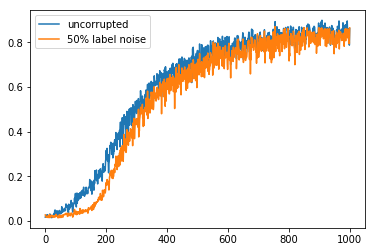

In [20]:
plt.plot(uncorr)
plt.plot(corr)
plt.legend(['uncorrupted', '50% label noise'])

In [10]:
#memorizing3
inceptionv3.train_and_compute_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])

'''Train generator ready, time elapsed: 404.054769993
Epoch: 0, loss: 4.22428750992, acc: 0.0188577584922
...
Epoch: 540, loss: 0.24833509326, acc: 0.929956912994'''

Train generator ready, time elapsed: 404.054769993
Epoch: 0, loss: 4.22428750992, acc: 0.0188577584922
Val: 0.0210129301995
Epoch: 1, loss: 4.22030496597, acc: 0.0193965509534
Epoch: 2, loss: 4.51411581039, acc: 0.0193965509534
Epoch: 3, loss: 4.15990781784, acc: 0.0183189660311
Epoch: 4, loss: 4.16516113281, acc: 0.0199353452772
Val: 0.0204741377383
Epoch: 5, loss: 4.27531576157, acc: 0.0226293094456
Epoch: 6, loss: 4.13281440735, acc: 0.0145474141464
Epoch: 7, loss: 4.15033435822, acc: 0.0193965509534
Epoch: 8, loss: 4.19442939758, acc: 0.0183189660311
Val: 0.0215517245233
Epoch: 9, loss: 4.09881639481, acc: 0.0183189660311
Epoch: 10, loss: 4.0555062294, acc: 0.0183189660311
Epoch: 11, loss: 3.92427492142, acc: 0.016702586785
Epoch: 12, loss: 3.86186766624, acc: 0.0226293094456
Val: 0.0215517245233
Epoch: 13, loss: 3.85072779655, acc: 0.0237068962306
Epoch: 14, loss: 3.85028243065, acc: 0.0193965509534
Epoch: 15, loss: 3.8462908268, acc: 0.0242456905544
Epoch: 16, loss: 3.84946656227

Val: 0.0285560339689
Epoch: 141, loss: 3.53777742386, acc: 0.0894396528602
Epoch: 142, loss: 3.50850582123, acc: 0.0905172377825
Epoch: 143, loss: 3.51272416115, acc: 0.100215516984
Epoch: 144, loss: 3.49921751022, acc: 0.0872844830155
Val: 0.0231681037694
Epoch: 145, loss: 3.49783229828, acc: 0.0905172377825
Epoch: 146, loss: 3.47144770622, acc: 0.106142237782
Epoch: 147, loss: 3.44987273216, acc: 0.109375
Epoch: 148, loss: 3.47796726227, acc: 0.106681033969
Val: 0.0204741377383
Epoch: 149, loss: 3.45994091034, acc: 0.110452584922
Epoch: 150, loss: 3.4471077919, acc: 0.102909483016
Epoch: 151, loss: 3.42360520363, acc: 0.103448279202
Epoch: 152, loss: 3.45651221275, acc: 0.103987067938
Val: 0.0253232754767
Epoch: 153, loss: 3.44260883331, acc: 0.108836203814
Epoch: 154, loss: 3.43124437332, acc: 0.107219830155
Epoch: 155, loss: 3.39706611633, acc: 0.118534483016
Epoch: 156, loss: 3.40936541557, acc: 0.115840516984
Val: 0.0210129301995
Epoch: 157, loss: 3.37646794319, acc: 0.1201508641

Epoch: 283, loss: 1.75084471703, acc: 0.526939630508
Epoch: 284, loss: 1.77694618702, acc: 0.52855604887
Val: 0.0323275849223
Epoch: 285, loss: 1.70115947723, acc: 0.542025864124
Epoch: 286, loss: 1.6149532795, acc: 0.560344815254
Epoch: 287, loss: 1.73158526421, acc: 0.535560369492
Epoch: 288, loss: 1.63914322853, acc: 0.556034505367
Val: 0.0269396547228
Epoch: 289, loss: 1.60352957249, acc: 0.56519395113
Epoch: 290, loss: 1.63767027855, acc: 0.565732777119
Epoch: 291, loss: 1.66333866119, acc: 0.551724135876
Epoch: 292, loss: 1.60304617882, acc: 0.577047407627
Val: 0.0264008622617
Epoch: 293, loss: 1.49819850922, acc: 0.600754320621
Epoch: 294, loss: 1.61941742897, acc: 0.572198271751
Epoch: 295, loss: 1.55114901066, acc: 0.573814630508
Epoch: 296, loss: 1.5690600872, acc: 0.578125
Val: 0.0274784490466
Epoch: 297, loss: 1.45770823956, acc: 0.595905184746
Epoch: 298, loss: 1.59028744698, acc: 0.564116358757
Epoch: 299, loss: 1.43663859367, acc: 0.614224135876
Epoch: 300, loss: 1.41123

Val: 0.0242456905544
Epoch: 425, loss: 0.465223670006, acc: 0.863685369492
Epoch: 426, loss: 0.409205853939, acc: 0.886853456497
Epoch: 427, loss: 0.47184458375, acc: 0.856142222881
Epoch: 428, loss: 0.456301808357, acc: 0.864224135876
Val: 0.0264008622617
Epoch: 429, loss: 0.391043484211, acc: 0.882004320621
Epoch: 430, loss: 0.495088934898, acc: 0.860452592373
Epoch: 431, loss: 0.376690357924, acc: 0.88793104887
Epoch: 432, loss: 0.402766466141, acc: 0.878771543503
Val: 0.0296336207539
Epoch: 433, loss: 0.357551604509, acc: 0.887392222881
Epoch: 434, loss: 0.429997414351, acc: 0.870150864124
Epoch: 435, loss: 0.407573997974, acc: 0.875538766384
Epoch: 436, loss: 0.367391765118, acc: 0.892780184746
Val: 0.0220905169845
Epoch: 437, loss: 0.414235651493, acc: 0.870689630508
Epoch: 438, loss: 0.476875752211, acc: 0.863685369492
Epoch: 439, loss: 0.39524024725, acc: 0.889008641243
Epoch: 440, loss: 0.386170059443, acc: 0.889008641243
Val: 0.0220905169845
Epoch: 441, loss: 0.326834768057, 

IOError: [Errno 28] No space left on device

In [17]:
#memorizing2 
inceptionv3.train_and_compute_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])

Train generator ready, time elapsed: 18.0721051693
Epoch: 0, loss: 4.20792913437, acc: 0.0183189660311
Val: 0.0183189660311
Epoch: 1, loss: 4.55330848694, acc: 0.015625
Epoch: 2, loss: 4.20648241043, acc: 0.0150862066075
Val: 0.0215517245233
Epoch: 3, loss: 4.22681236267, acc: 0.0183189660311
Epoch: 4, loss: 4.15933656693, acc: 0.0172413792461
Val: 0.0215517245233
Epoch: 5, loss: 4.15010976791, acc: 0.0150862066075
Epoch: 6, loss: 4.12266159058, acc: 0.0199353452772
Val: 0.0199353452772
Epoch: 7, loss: 4.14025831223, acc: 0.0177801717073
Epoch: 8, loss: 4.12471199036, acc: 0.0210129301995
Val: 0.0215517245233
Epoch: 9, loss: 4.06814861298, acc: 0.016702586785
Epoch: 10, loss: 4.06806898117, acc: 0.0215517245233
Val: 0.0215517245233
Epoch: 11, loss: 4.08185100555, acc: 0.016702586785
Epoch: 12, loss: 4.05561637878, acc: 0.0177801717073
Val: 0.0177801717073
Epoch: 13, loss: 4.08010292053, acc: 0.0237068962306
Epoch: 14, loss: 4.05409908295, acc: 0.0161637924612
Val: 0.0188577584922
Epoch

Epoch: 129, loss: 3.74903798103, acc: 0.0436422415078
Epoch: 130, loss: 3.75867509842, acc: 0.0409482754767
Val: 0.0231681037694
Epoch: 131, loss: 3.73664069176, acc: 0.0387931019068
Epoch: 132, loss: 3.74057865143, acc: 0.0436422415078
Val: 0.0199353452772
Epoch: 133, loss: 3.7403011322, acc: 0.0409482754767
Epoch: 134, loss: 3.74379563332, acc: 0.042025860399
Val: 0.030172413215
Epoch: 135, loss: 3.73359370232, acc: 0.0457974150777
Epoch: 136, loss: 3.74092340469, acc: 0.036099139601
Val: 0.0237068962306
Epoch: 137, loss: 3.72794151306, acc: 0.0463362075388
Epoch: 138, loss: 3.73515319824, acc: 0.0409482754767
Val: 0.0377155169845
Epoch: 139, loss: 3.72564077377, acc: 0.0409482754767
Epoch: 140, loss: 3.73587489128, acc: 0.042025860399
Val: 0.0393318980932
Epoch: 141, loss: 3.73407077789, acc: 0.0463362075388
Epoch: 142, loss: 3.73939156532, acc: 0.0350215509534
Val: 0.0220905169845
Epoch: 143, loss: 3.73675084114, acc: 0.0463362075388
Epoch: 144, loss: 3.7372367382, acc: 0.042025860

Epoch: 258, loss: 3.43354964256, acc: 0.0969827622175
Val: 0.0323275849223
Epoch: 259, loss: 3.40730023384, acc: 0.109913796186
Epoch: 260, loss: 3.39905619621, acc: 0.104525864124
Val: 0.0323275849223
Epoch: 261, loss: 3.41499018669, acc: 0.0959051698446
Epoch: 262, loss: 3.40691900253, acc: 0.117995686829
Val: 0.03125
Epoch: 263, loss: 3.41123151779, acc: 0.108297415078
Epoch: 264, loss: 3.38324594498, acc: 0.110452584922
Val: 0.0231681037694
Epoch: 265, loss: 3.35888743401, acc: 0.122844830155
Epoch: 266, loss: 3.39874577522, acc: 0.111530169845
Val: 0.0328663811088
Epoch: 267, loss: 3.36113715172, acc: 0.110991381109
Epoch: 268, loss: 3.39433860779, acc: 0.109913796186
Val: 0.0339439660311
Epoch: 269, loss: 3.38002753258, acc: 0.106142237782
Epoch: 270, loss: 3.3374516964, acc: 0.116379313171
Val: 0.0307112075388
Epoch: 271, loss: 3.39272499084, acc: 0.106142237782
Epoch: 272, loss: 3.36012673378, acc: 0.113146550953
Val: 0.03125
Epoch: 273, loss: 3.32616257668, acc: 0.132543101907

IOError: 417269760 requested and 297750000 written

In [50]:
# memorizing 1
inceptionv3.train_and_compute_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])

Train generator ready, time elapsed: 18.3066239357
Epoch: 0, loss: 4.07017421722, acc: 0.0457974150777
Val: 0.0215517245233
Epoch: 1, loss: 3.95395255089, acc: 0.0765086188912
Epoch: 2, loss: 3.81776404381, acc: 0.0856681019068
Val: 0.0274784490466
Epoch: 3, loss: 3.79651331902, acc: 0.0921336188912
Epoch: 4, loss: 3.84251570702, acc: 0.0829741358757
Val: 0.0183189660311
Epoch: 5, loss: 3.71569108963, acc: 0.104525864124
Epoch: 6, loss: 3.59529614449, acc: 0.114762932062
Val: 0.030172413215
Epoch: 7, loss: 3.53423976898, acc: 0.126616373658
Epoch: 8, loss: 3.48844432831, acc: 0.141163796186
Val: 0.0226293094456
Epoch: 9, loss: 3.38816738129, acc: 0.138469830155
Epoch: 10, loss: 3.21254682541, acc: 0.154633626342
Val: 0.0258620698005
Epoch: 11, loss: 3.11616444588, acc: 0.167025864124
Epoch: 12, loss: 3.02064108849, acc: 0.193426728249
Val: 0.0344827584922
Epoch: 13, loss: 2.90528607368, acc: 0.206357762218
Epoch: 14, loss: 2.87765598297, acc: 0.219827592373
Val: 0.0296336207539
Epoch: 

Epoch: 130, loss: 0.0969701111317, acc: 0.973599135876
Val: 0.0592672415078
Epoch: 131, loss: 0.109592102468, acc: 0.971982777119
Epoch: 132, loss: 0.121964998543, acc: 0.963900864124
Val: 0.0474137924612
Epoch: 133, loss: 0.121895372868, acc: 0.96605604887
Epoch: 134, loss: 0.104574009776, acc: 0.962823271751
Val: 0.0592672415078
Epoch: 135, loss: 0.141100764275, acc: 0.954202592373
Epoch: 136, loss: 0.12562571466, acc: 0.95851290226
Val: 0.0598060339689
Epoch: 137, loss: 0.132362395525, acc: 0.957974135876
Epoch: 138, loss: 0.126098334789, acc: 0.964439630508
Val: 0.0431034490466
Epoch: 139, loss: 0.138479202986, acc: 0.95581895113
Epoch: 140, loss: 0.119030423462, acc: 0.96336209774
Val: 0.0554956905544
Epoch: 141, loss: 0.135146275163, acc: 0.959051728249
Epoch: 142, loss: 0.0895030200481, acc: 0.973060369492
Val: 0.0587284490466
Epoch: 143, loss: 0.0932655110955, acc: 0.969288766384
Epoch: 144, loss: 0.11921646446, acc: 0.962284505367
Val: 0.0592672415078
Epoch: 145, loss: 0.12206

Val: 0.0662715509534
Epoch: 257, loss: 0.0350261367857, acc: 0.990301728249
Epoch: 258, loss: 0.0421565249562, acc: 0.989224135876
Val: 0.0463362075388
Epoch: 259, loss: 0.0378952696919, acc: 0.98976290226
Epoch: 260, loss: 0.0258518010378, acc: 0.992456912994
Val: 0.0657327622175
Epoch: 261, loss: 0.0244504082948, acc: 0.991918087006
Epoch: 262, loss: 0.0289608705789, acc: 0.992995679379
Val: 0.0824353471398
Epoch: 263, loss: 0.0347021892667, acc: 0.990301728249
Epoch: 264, loss: 0.0387923084199, acc: 0.988685369492
Val: 0.0673491358757
Epoch: 265, loss: 0.0345307178795, acc: 0.993534505367
Epoch: 266, loss: 0.0238083545119, acc: 0.992995679379
Val: 0.0727370679379
Epoch: 267, loss: 0.0198188293725, acc: 0.995689630508
Epoch: 268, loss: 0.022757243365, acc: 0.992456912994
Val: 0.0754310339689
Epoch: 269, loss: 0.0391412526369, acc: 0.990301728249
Epoch: 270, loss: 0.032679785043, acc: 0.992456912994
Val: 0.0802801698446
Epoch: 271, loss: 0.0382509753108, acc: 0.990301728249
Epoch: 272

Epoch: 383, loss: 0.0357750728726, acc: 0.990840494633
Epoch: 384, loss: 0.0124042537063, acc: 0.995150864124
Val: 0.0711206868291
Epoch: 385, loss: 0.0351561941206, acc: 0.991379320621
Epoch: 386, loss: 0.0455415397882, acc: 0.989224135876
Val: 0.0695043131709
Epoch: 387, loss: 0.0385570786893, acc: 0.991379320621
Epoch: 388, loss: 0.0308506041765, acc: 0.990840494633
Val: 0.0603448264301
Epoch: 389, loss: 0.0203839335591, acc: 0.995150864124
Epoch: 390, loss: 0.0148763190955, acc: 0.996228456497
Val: 0.0727370679379
Epoch: 391, loss: 0.0283623654395, acc: 0.99461209774
Epoch: 392, loss: 0.0137972962111, acc: 0.994073271751
Val: 0.0657327622175
Epoch: 393, loss: 0.0130704753101, acc: 0.99730604887
Epoch: 394, loss: 0.0214960798621, acc: 0.995150864124
Val: 0.0862068980932
Epoch: 395, loss: 0.0182736068964, acc: 0.996767222881
Epoch: 396, loss: 0.0153674380854, acc: 0.99461209774
Val: 0.0759698301554
Epoch: 397, loss: 0.0281450636685, acc: 0.992995679379
Epoch: 398, loss: 0.01494209654

Epoch: 510, loss: 0.0107172997668, acc: 0.99730604887
Val: 0.0759698301554
Epoch: 511, loss: 0.0114082191139, acc: 0.995689630508
Epoch: 512, loss: 0.0197015870363, acc: 0.993534505367
Val: 0.0754310339689
Epoch: 513, loss: 0.0233146101236, acc: 0.995150864124
Epoch: 514, loss: 0.0174182094634, acc: 0.996767222881
Val: 0.0743534490466
Epoch: 515, loss: 0.0199661962688, acc: 0.996228456497
Epoch: 516, loss: 0.0112606408074, acc: 0.99730604887
Val: 0.0705818980932
Epoch: 517, loss: 0.00773980142549, acc: 0.997844815254
Epoch: 518, loss: 0.0264259371907, acc: 0.995150864124
Val: 0.0689655169845
Epoch: 519, loss: 0.00735069485381, acc: 0.998922407627
Epoch: 520, loss: 0.00996295269579, acc: 0.997844815254
Val: 0.0705818980932
Epoch: 521, loss: 0.0112241283059, acc: 0.99730604887
Epoch: 522, loss: 0.0116848768666, acc: 0.996767222881
Val: 0.0732758641243
Epoch: 523, loss: 0.0100527377799, acc: 0.998383641243
Epoch: 524, loss: 0.0159886125475, acc: 0.99730604887
Val: 0.0592672415078
Epoch: 5

KeyboardInterrupt: 

In [ ]:
exit(0)

SGD no random cropping 
Epoch: 0, loss: 1.63750708103, acc: 0.623922407627
Val: 0.0188577586207
Epoch: 1, loss: 0.00799295399338, acc: 1.0
Epoch: 2, loss: 0.00217197346501, acc: 1.0
Epoch: 3, loss: 0.00150913698599, acc: 1.0
Epoch: 4, loss: 0.00121806107927, acc: 1.0
Epoch: 5, loss: 0.00103659136221, acc: 1.0
Epoch: 6, loss: 0.000908471818548, acc: 1.0
Epoch: 7, loss: 0.00081175158266, acc: 1.0
Epoch: 8, loss: 0.000735574576538, acc: 1.0
Epoch: 9, loss: 0.00067370175384, acc: 1.0
Epoch: 10, loss: 0.0006222743541, acc: 1.0
Epoch: 11, loss: 0.000578723964281, acc: 1.0
Epoch: 12, loss: 0.000541320710909, acc: 1.0
Epoch: 13, loss: 0.000508823082782, acc: 1.0
Epoch: 14, loss: 0.000480292423163, acc: 1.0
Epoch: 15, loss: 0.00045502310968, acc: 1.0
Epoch: 16, loss: 0.000432466476923, acc: 1.0
Epoch: 17, loss: 0.00041218593833, acc: 1.0
Epoch: 18, loss: 0.00039383789408, acc: 1.0
Epoch: 19, loss: 0.000377152056899, acc: 1.0
Epoch: 20, loss: 0.000361909245839, acc: 1.0
Epoch: 21, loss: 0.000347927620169, acc: 1.0
Epoch: 22, loss: 0.000335047603585, acc: 1.0
Epoch: 23, loss: 0.000323134037899, acc: 1.0
Epoch: 24, loss: 0.000312079966534, acc: 1.0
Stopped

In [ ]:
inceptionv3.train_and_compute_rcvs(dataset, layers_of_interest=['mixed0', 'mixed2','mixed4', 'mixed6', 'mixed8'])